**Notebook 6: Tipologías PME**

Objetivo: Generar tipologías PME en base a clasificación de acciones y agrupamientos previos.

In [1]:
import pandas as pd
import os 
from stepmix.stepmix import StepMix
import matplotlib.pyplot as plt

In [2]:
# Directorios [cambiar a directorio propios]
pme_path = r'C:\Users\JoaquinFarina\Dropbox\Team NLP\Data\Planes de Mejoramiento Educativo\InformeFinal'
# establecer directorio de trabajo
os.chdir(pme_path)

# Latent class analysis


In [3]:
df_planificacion_total_rbd_no = pd.read_csv(r'Datos\Finales\Nivel_PME\df_planificacion_implementacion_total_2018_2022_PME_FINAL.csv',
                                                      low_memory=False)

In [4]:
cols_ee =  ['agno','rbd', 'region','deprov','comuna','dependencia','rural_rbd',
            'básica_adultos','básica_niños','media_hc_adultos','media_hc_jóvenes','media_tp_y_artística_adultos',
            'media_tp_y_artística_jóvenes','parvularia','parvularia_ind','básica_niños_ind','media_hc_jóvenes_ind',
            'media_tp_y_artística_jóvenes_ind','básica_adultos_ind','media_hc_adultos_ind','media_tp_y_artística_adultos_ind',
            'total_niveles','total_matricula','asistencia','prioritario_alu','idps_am_agno_previo','idps_cc_agno_previo',
            'idps_hv_agno_previo','idps_pf_agno_previo','prom_idps_agno_previo','prom_lect_agno_previo',
            'prom_mate_agno_previo','prom_mate_lect_agno_previo','n_docentes','horas_contrato','horas_direct',
            'horas_tec_ped','horas_aula','ano_servicio_sistema','ano_servicio_ee']

In [5]:
cols_lca = ['Subtema_Foco_en_innovacion_pedagogica_/_aprendizajes_integrales','Subtema_Foco_en_asignaturas.Lectura',
            'Subtema_Pedagogia_para_la_pandemia_y_pospandemia','Subtema_Diversidad_e_inclusion',
            'Subtema_Planificacion,_evaluacion_y_seguimiento','Subtema_Seguridad_Escolar_',
            'Subtema_Genero_y_No_Discriminacion','Subtema_Educacion_Sexual','Subtema_Vida_Democratica',
            'Subtema_Genero_','Subtema_Liderazgo_medio_1','Subtema_Foco_en_asignaturas._Matematica']

## Normalizar columnas por n° de acciones

In [6]:
df_models = df_planificacion_total_rbd_no.copy()
df_models = df_models.rename(columns = {'ninguno_ind':'plan_ninguno_ind'})

for case in ['plan_','nombre_responsable_','REACT_','CLUSTER_','Tema_','Subtema_','Unidad_','porcentaje_ejecucion_',
             'programa_', 'TOPIC_']:
    for col in df_models.columns:
        if case in col: 
            df_models.loc[:,col +'_model'] = np.round(df_models[col]/df_models.total_acciones,3)
            print(df_models[col+'_model'].value_counts())
            

for col in df_models.columns:
    if 'monto_' in col: 
        # acotar outliers
        df_models.loc[:,col+'_model'] = df_models[col]/df_models.total_matricula
        df_models.loc[:,col+'_model'] = (df_models[col+'_model']-min(df_models[col+'_model']))/(df_models[col+'_model'].quantile(.75)-min(df_models[col+'_model']))
            
        print(df_models[col+'_model'].value_counts())
        
df_models['monto_total_model'].value_counts().sort_index()

0.000    12893
0.125     1670
0.250     1469
0.100      836
0.200      797
         ...  
0.425        1
0.980        1
0.173        1
0.009        1
0.010        1
Name: plan_de_sexualidad_afectividad_y_género_ind_model, Length: 605, dtype: int64
0.000    2998
0.500    2440
0.250    1982
0.333    1214
0.375    1188
         ... 
0.804       1
0.532       1
0.946       1
0.771       1
0.131       1
Name: plan_de_desarollo_profesional_docente_ind_model, Length: 670, dtype: int64
1.000    3155
0.500    2576
0.250    1505
0.750    1415
0.375    1103
         ... 
0.981       1
0.592       1
0.508       1
0.020       1
0.544       1
Name: plan_de_gestión_de_la_convivencia_escolar_ind_model, Length: 718, dtype: int64
0.000    11270
0.125     1944
0.250     1562
0.100      974
0.200      896
         ...  
0.645        1
0.648        1
0.872        1
0.352        1
0.881        1
Name: plan_de_formación_ciudadana_ind_model, Length: 603, dtype: int64
0.000    8167
0.250    1858
0.125    1655


0.000    6537
0.125    2999
0.250    2360
0.200    1335
0.100    1244
         ... 
0.314       1
0.155       1
0.110       1
0.317       1
0.153       1
Name: Tema_Gabinete_DEG_model, Length: 359, dtype: int64
0.000    42292
0.125       73
0.062       54
0.100       46
0.083       46
         ...  
0.312        1
0.278        1
0.263        1
0.150        1
0.102        1
Name: Tema_Trayectoria_Educativas_y_aprendizajes_a_lo_largo_de_la_vida_model, Length: 90, dtype: int64
0.000    26257
0.125     1222
0.100      879
0.062      764
0.083      689
         ...  
0.189        1
0.206        1
0.104        1
0.226        1
0.750        1
Name: Subtema_Foco_en_evaluacion_estandarizada_model, Length: 197, dtype: int64
0.000    29588
0.125     1048
0.100      678
0.062      605
0.111      547
         ...  
0.191        1
0.106        1
0.140        1
0.242        1
0.522        1
Name: Subtema_Foco_en_modalidades_model, Length: 188, dtype: int64
0.000    17958
0.125     2162
0.100     1287

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\2536240300.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_models.loc[:,col +'_model'] = np.round(df_models[col]/df_models.total_acciones,3)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\2536240300.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_models.loc[:,col +'_model'] = np.round(df_models[col]/df_models.total_acciones,3)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\2536240300.py:8: PerformanceWarning: DataFrame is highly fragmen

0.000    37403
0.125      326
0.062      286
0.071      223
0.100      205
         ...  
0.132        1
0.052        1
0.269        1
0.346        1
0.005        1
Name: porcentaje_ejecucion_0_model, Length: 241, dtype: int64
0.000    38746
0.125      325
0.062      220
0.100      183
0.071      173
         ...  
0.172        1
0.263        1
0.093        1
0.700        1
0.012        1
Name: porcentaje_ejecucion_1_24_model, Length: 188, dtype: int64
0.000    34104
1.000     1467
0.125      339
0.100      240
0.083      217
         ...  
0.386        1
0.102        1
0.520        1
0.064        1
0.315        1
Name: programa_asociado_otro_model, Length: 458, dtype: int64
1.000    19682
0.000     5812
0.875      833
0.900      611
0.750      507
         ...  
0.310        1
0.451        1
0.606        1
0.757        1
0.681        1
Name: programa_asociado_sep_model, Length: 556, dtype: int64
0.000    42391
0.125      114
0.062       59
0.071       48
0.100       44
         ...  


0.000000    11075
1.227214      181
0.613607      137
0.818143      117
0.490886      106
            ...  
1.035000        1
0.809152        1
0.984162        1
3.895453        1
0.311172        1
Name: monto_sep_model, Length: 25394, dtype: int64
inf    7470
Name: monto_pie_model, dtype: int64
inf    685
Name: monto_mantenimiento_model, dtype: int64
inf    1588
Name: monto_pro_retencion_model, dtype: int64
inf    18
Name: monto_internado_model, dtype: int64
inf    47
Name: monto_reforzamiento_model, dtype: int64
inf    1104
Name: monto_feap_model, dtype: int64
inf    271
Name: monto_aporte_municipal_model, dtype: int64
0.000000    9399
1.080819     165
0.540410     117
0.720546     103
0.432328     101
            ... 
0.344631       1
0.390956       1
0.340258       1
0.424119       1
0.499740       1
Name: monto_total_model, Length: 27121, dtype: int64


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\2536240300.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_models.loc[:,col +'_model'] = np.round(df_models[col]/df_models.total_acciones,3)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\2536240300.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_models.loc[:,col +'_model'] = np.round(df_models[col]/df_models.total_acciones,3)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\2536240300.py:8: PerformanceWarning: DataFrame is highly fragmen

0.000000e+00    9399
3.486514e-08       1
4.857614e-08       1
5.320956e-08       1
9.976793e-08       1
                ... 
1.361912e+03       1
1.737984e+03       1
1.808463e+03       1
2.529117e+03       1
8.476973e+04       1
Name: monto_total_model, Length: 27121, dtype: int64

In [7]:
# conjuntos de atributos considerados (por separado) para clustering
plan_cols = [x for x in df_models.columns if ('plan_' in x)&('_ind' in x)]
Tema_cols = [x for x in df_models.columns if 'Tema_' in x]
Subtema_cols = [x for x in df_models.columns if 'Subtema_' in x]
CLUSTER_cols = [x for x in df_models.columns if 'CLUSTER_' in x]
Unidad_cols = [x for x in df_models.columns if 'Unidad_' in x]
porcentaje_ejecucion_cols = [x for x in df_models.columns if 'porcentaje_ejecucion_' in x]
nombre_responsable_cols = [x for x in df_models.columns if 'nombre_responsable_' in x]
TOPIC_cols = [x for x in df_models.columns if 'TOPIC_' in x]

In [8]:
select_ejecucion = ['porcentaje_ejecucion_75_99','porcentaje_ejecucion_100']
select_programa = ['programa_asociado_sep']
select_monto = ['monto_total']
select_linguist = ['n_palabras_descripcion_plan','descripcion_positiva']

## STEPMIX models for LCA

https://colab.research.google.com/drive/1KAxcvxjL_vB2lAG9e47we7hrf_2fR1eK?usp=sharing#scrollTo=CnaWQGJ3V3zd

### Especificación 1: Según Planes asociados

2018
0    0.383236
1    0.616764
Name: LCA_clss_pred_2, dtype: float64
       0      1
0  0.978  0.012
1  0.022  0.988


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a co

0    0.267753
1    0.280675
2    0.451572
Name: LCA_clss_pred_3, dtype: float64
       0      1      2
0  0.999  0.000  0.000
1  0.000  0.977  0.012
2  0.001  0.023  0.987


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.433993
1    0.106403
2    0.174854
3    0.284750
Name: LCA_clss_pred_4, dtype: float64
       0      1    2      3
0  0.978  0.000  0.0  0.035
1  0.000  0.974  0.0  0.008
2  0.000  0.000  1.0  0.000
3  0.022  0.026  0.0  0.957


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.174854
1    0.095227
2    0.246100
3    0.294412
4    0.189406
Name: LCA_clss_pred_5, dtype: float64
     0      1      2      3      4
0  1.0  0.000  0.000  0.000  0.000
1  0.0  0.971  0.009  0.000  0.000
2  0.0  0.029  0.953  0.028  0.006
3  0.0  0.000  0.031  0.935  0.065
4  0.0  0.000  0.006  0.037  0.929


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.056577
1    0.241327
2    0.265658
3    0.119325
4    0.142258
5    0.174854
Name: LCA_clss_pred_6, dtype: float64
       0      1      2      3      4    5
0  0.977  0.000  0.000  0.012  0.000  0.0
1  0.000  0.957  0.000  0.018  0.056  0.0
2  0.001  0.000  0.985  0.038  0.000  0.0
3  0.022  0.010  0.014  0.932  0.000  0.0
4  0.000  0.033  0.000  0.000  0.944  0.0
5  0.000  0.000  0.000  0.000  0.000  1.0


C:\Users\JoaquinFarina\anaconda3\lib\site-packages\stepmix\stepmix.py:812: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.090105
1    0.338650
2    0.132247
3    0.029336
4    0.115250
5    0.174854
6    0.119558
Name: LCA_clss_pred_7, dtype: float64
       0      1      2      3      4    5      6
0  0.947  0.000  0.012  0.018  0.017  0.0  0.000
1  0.000  0.948  0.051  0.000  0.026  0.0  0.061
2  0.025  0.021  0.903  0.000  0.047  0.0  0.001
3  0.007  0.000  0.000  0.982  0.000  0.0  0.000
4  0.021  0.008  0.033  0.000  0.910  0.0  0.000
5  0.000  0.000  0.000  0.000  0.000  1.0  0.000
6  0.000  0.022  0.000  0.000  0.000  0.0  0.938


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.095809
1    0.108382
2    0.095227
3    0.265774
4    0.075902
5    0.174854
6    0.063213
7    0.120838
Name: LCA_clss_pred_8, dtype: float64
       0      1      2      3      4    5      6      7
0  0.997  0.000  0.000  0.001  0.000  0.0  0.000  0.000
1  0.000  0.903  0.006  0.006  0.000  0.0  0.045  0.042
2  0.000  0.007  0.954  0.002  0.013  0.0  0.000  0.027
3  0.003  0.001  0.000  0.988  0.016  0.0  0.000  0.000
4  0.000  0.000  0.009  0.003  0.971  0.0  0.000  0.000
5  0.000  0.000  0.000  0.000  0.000  1.0  0.000  0.000
6  0.000  0.026  0.000  0.000  0.000  0.0  0.935  0.006
7  0.000  0.061  0.031  0.000  0.000  0.0  0.020  0.924


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.099069
1    0.174854
2    0.099884
3    0.248079
4    0.116182
5    0.081490
6    0.055879
7    0.024913
8    0.099651
Name: LCA_clss_pred_9, dtype: float64
       0    1      2      3      4      5      6      7      8
0  0.998  0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000
1  0.000  1.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000
2  0.000  0.0  0.914  0.001  0.024  0.000  0.016  0.000  0.058
3  0.002  0.0  0.000  0.987  0.000  0.021  0.000  0.000  0.000
4  0.000  0.0  0.020  0.000  0.944  0.014  0.000  0.000  0.024
5  0.000  0.0  0.000  0.006  0.013  0.959  0.000  0.012  0.000
6  0.000  0.0  0.013  0.000  0.000  0.000  0.950  0.000  0.017
7  0.000  0.0  0.000  0.000  0.000  0.007  0.000  0.988  0.000
8  0.000  0.0  0.054  0.004  0.020  0.000  0.033  0.000  0.901


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.052503
1    0.024563
2    0.087544
3    0.077532
4    0.105588
5    0.044121
6    0.174854
7    0.243772
8    0.090454
9    0.099069
Name: LCA_clss_pred_10, dtype: float64
       0      1      2      3      4      5    6      7      8      9
0  0.947  0.000  0.017  0.000  0.000  0.014  0.0  0.000  0.007  0.000
1  0.000  0.989  0.000  0.006  0.000  0.000  0.0  0.000  0.000  0.000
2  0.025  0.000  0.900  0.000  0.013  0.031  0.0  0.005  0.052  0.000
3  0.000  0.011  0.000  0.962  0.010  0.000  0.0  0.007  0.000  0.000
4  0.000  0.000  0.013  0.013  0.942  0.012  0.0  0.000  0.024  0.000
5  0.017  0.000  0.014  0.000  0.003  0.902  0.0  0.005  0.005  0.000
6  0.000  0.000  0.000  0.000  0.000  0.000  1.0  0.000  0.000  0.000
7  0.000  0.000  0.004  0.019  0.000  0.025  0.0  0.982  0.000  0.002
8  0.011  0.000  0.053  0.000  0.031  0.016  0.0  0.001  0.912  0.000
9  0.000  0.000  0.000  0.000  0.000  0.000  0.0  0.000  0.000  0.998
8590


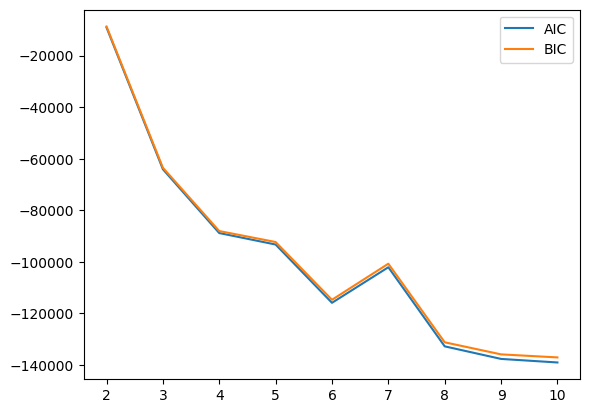

2019
0    0.421181
1    0.578819
Name: LCA_clss_pred_2, dtype: float64
       0      1
0  0.981  0.015
1  0.019  0.985


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a co

0    0.295325
1    0.437420
2    0.267254
Name: LCA_clss_pred_3, dtype: float64
       0      1    2
0  0.975  0.018  0.0
1  0.025  0.982  0.0
2  0.000  0.000  1.0


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.173762
1    0.118548
2    0.396474
3    0.311217
Name: LCA_clss_pred_4, dtype: float64
     0     1      2      3
0  1.0  0.00  0.000  0.000
1  0.0  0.97  0.000  0.012
2  0.0  0.00  0.973  0.034
3  0.0  0.03  0.027  0.954


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.109152
1    0.173762
2    0.386614
3    0.158334
4    0.172138
Name: LCA_clss_pred_5, dtype: float64
       0    1      2      3      4
0  0.972  0.0  0.000  0.006  0.012
1  0.000  1.0  0.000  0.000  0.000
2  0.000  0.0  0.974  0.033  0.022
3  0.010  0.0  0.014  0.924  0.035
4  0.018  0.0  0.012  0.036  0.932


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.161118
1    0.096045
2    0.189769
3    0.065074
4    0.173762
5    0.314233
Name: LCA_clss_pred_6, dtype: float64
       0      1      2      3    4      5
0  0.943  0.000  0.004  0.000  0.0  0.024
1  0.000  0.939  0.022  0.014  0.0  0.005
2  0.003  0.041  0.929  0.009  0.0  0.026
3  0.000  0.011  0.003  0.976  0.0  0.000
4  0.000  0.000  0.000  0.000  1.0  0.000
5  0.054  0.008  0.042  0.000  0.0  0.946


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.038395
1    0.045238
2    0.173762
3    0.088389
4    0.298805
5    0.179330
6    0.176082
Name: LCA_clss_pred_7, dtype: float64
       0      1    2      3      4      5      6
0  0.977  0.006  0.0  0.007  0.000  0.000  0.000
1  0.006  0.938  0.0  0.011  0.002  0.000  0.000
2  0.000  0.000  1.0  0.000  0.000  0.000  0.000
3  0.017  0.025  0.0  0.947  0.005  0.009  0.000
4  0.000  0.027  0.0  0.022  0.992  0.000  0.000
5  0.000  0.004  0.0  0.013  0.000  0.955  0.042
6  0.000  0.000  0.0  0.000  0.001  0.035  0.958


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.092101
1    0.111472
2    0.108224
3    0.031435
4    0.321192
5    0.173762
6    0.099524
7    0.062290
Name: LCA_clss_pred_8, dtype: float64
       0      1      2      3      4    5      6      7
0  0.920  0.030  0.035  0.000  0.000  0.0  0.000  0.018
1  0.036  0.943  0.015  0.000  0.000  0.0  0.018  0.001
2  0.034  0.015  0.932  0.000  0.000  0.0  0.000  0.043
3  0.000  0.000  0.000  0.982  0.000  0.0  0.004  0.000
4  0.000  0.000  0.000  0.000  0.992  0.0  0.034  0.000
5  0.000  0.000  0.000  0.000  0.000  1.0  0.000  0.000
6  0.000  0.012  0.000  0.018  0.008  0.0  0.945  0.000
7  0.010  0.000  0.017  0.000  0.000  0.0  0.000  0.938


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.032827
1    0.225032
2    0.152767
3    0.173762
4    0.161466
5    0.045006
6    0.052082
7    0.086881
8    0.070177
Name: LCA_clss_pred_9, dtype: float64
       0      1      2    3      4      5      6      7      8
0  0.974  0.000  0.000  0.0  0.003  0.000  0.003  0.000  0.000
1  0.000  0.979  0.000  0.0  0.028  0.000  0.000  0.000  0.000
2  0.000  0.000  0.946  0.0  0.000  0.065  0.000  0.040  0.040
3  0.000  0.000  0.000  1.0  0.000  0.000  0.000  0.000  0.000
4  0.017  0.021  0.000  0.0  0.969  0.000  0.000  0.000  0.000
5  0.000  0.000  0.017  0.0  0.000  0.932  0.000  0.000  0.000
6  0.009  0.000  0.000  0.0  0.000  0.000  0.966  0.013  0.013
7  0.000  0.000  0.018  0.0  0.000  0.000  0.021  0.911  0.033
8  0.000  0.000  0.019  0.0  0.000  0.002  0.010  0.036  0.914
0    0.074817
1    0.091869
2    0.061710
3    0.071337
4    0.267022
5    0.092913
6    0.093377
7    0.173762
8    0.041643
9    0.031551
Name: LCA_clss_pred_10, dtype: float64
       0      1      2     

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


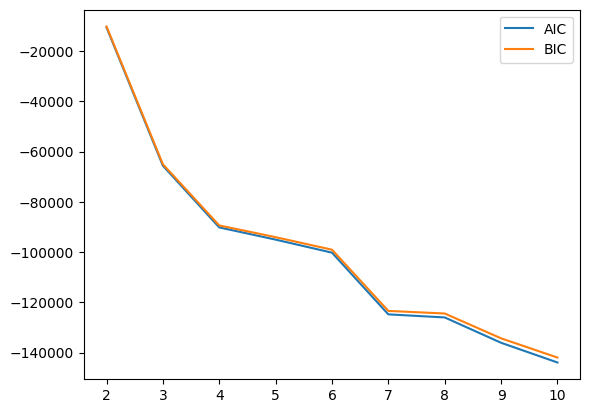

2020


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.436347
1    0.563653
Name: LCA_clss_pred_2, dtype: float64
       0      1
0  0.976  0.018
1  0.024  0.982


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.241320
1    0.351896
2    0.406784
Name: LCA_clss_pred_3, dtype: float64
       0    1      2
0  0.967  0.0  0.017
1  0.000  1.0  0.000
2  0.033  0.0  0.983


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.257821
1    0.287957
2    0.102326
3    0.351896
Name: LCA_clss_pred_4, dtype: float64
       0      1      2    3
0  0.957  0.033  0.000  0.0
1  0.043  0.958  0.028  0.0
2  0.000  0.008  0.972  0.0
3  0.000  0.000  0.000  1.0


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.151026
1    0.349490
2    0.094076
3    0.172797
4    0.232611
Name: LCA_clss_pred_5, dtype: float64
       0      1      2      3    4
0  0.960  0.000  0.007  0.032  0.0
1  0.000  0.994  0.023  0.000  0.0
2  0.004  0.005  0.970  0.000  0.0
3  0.036  0.002  0.000  0.967  0.0
4  0.000  0.000  0.000  0.000  1.0


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.063252
1    0.136931
2    0.078836
3    0.322906
4    0.050877
5    0.347198
Name: LCA_clss_pred_6, dtype: float64
       0      1      2      3      4      5
0  0.975  0.000  0.006  0.004  0.000  0.000
1  0.000  0.951  0.044  0.000  0.051  0.000
2  0.007  0.029  0.950  0.000  0.000  0.000
3  0.018  0.000  0.000  0.994  0.000  0.002
4  0.000  0.020  0.000  0.000  0.949  0.000
5  0.000  0.000  0.000  0.002  0.000  0.998


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.232611
1    0.270883
2    0.084107
3    0.147817
4    0.119285
5    0.056148
6    0.089149
Name: LCA_clss_pred_7, dtype: float64
     0      1      2      3    4      5      6
0  1.0  0.000  0.000  0.000  0.0  0.000  0.000
1  0.0  0.984  0.000  0.029  0.0  0.016  0.003
2  0.0  0.000  0.954  0.000  0.0  0.008  0.041
3  0.0  0.009  0.000  0.970  0.0  0.000  0.000
4  0.0  0.000  0.000  0.000  1.0  0.000  0.000
5  0.0  0.004  0.004  0.000  0.0  0.976  0.000
6  0.0  0.002  0.041  0.000  0.0  0.000  0.956


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.064054
1    0.055689
2    0.048699
3    0.059471
4    0.271571
5    0.119285
6    0.232611
7    0.148619
Name: LCA_clss_pred_8, dtype: float64
       0      1      2      3      4    5    6      7
0  0.956  0.036  0.007  0.013  0.000  0.0  0.0  0.000
1  0.030  0.918  0.000  0.032  0.000  0.0  0.0  0.001
2  0.004  0.000  0.979  0.000  0.002  0.0  0.0  0.000
3  0.010  0.046  0.000  0.950  0.002  0.0  0.0  0.000
4  0.000  0.000  0.015  0.004  0.985  0.0  0.0  0.023
5  0.000  0.000  0.000  0.000  0.000  1.0  0.0  0.000
6  0.000  0.000  0.000  0.000  0.000  0.0  1.0  0.000
7  0.000  0.000  0.000  0.000  0.011  0.0  0.0  0.975


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.034032
1    0.077690
2    0.025667
3    0.059241
4    0.232268
5    0.348344
6    0.116077
7    0.053283
8    0.053398
Name: LCA_clss_pred_9, dtype: float64
       0      1      2      3      4      5      6      7      8
0  0.961  0.000  0.007  0.011  0.000  0.000  0.000  0.000  0.005
1  0.000  0.937  0.000  0.022  0.000  0.000  0.000  0.051  0.033
2  0.000  0.000  0.967  0.000  0.000  0.000  0.002  0.000  0.000
3  0.026  0.016  0.000  0.917  0.000  0.000  0.000  0.002  0.046
4  0.000  0.000  0.000  0.000  0.980  0.003  0.032  0.000  0.000
5  0.000  0.000  0.000  0.000  0.002  0.997  0.000  0.000  0.000
6  0.000  0.000  0.026  0.000  0.017  0.000  0.966  0.000  0.000
7  0.000  0.026  0.000  0.003  0.000  0.000  0.000  0.943  0.007
8  0.013  0.021  0.000  0.046  0.000  0.000  0.000  0.005  0.909
0    0.232611
1    0.073794
2    0.099576
3    0.023834
4    0.216798
5    0.019938
6    0.079294
7    0.116879
8    0.017990
9    0.119285
Name: LCA_clss_pred_10, dtype: float64
     0 

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


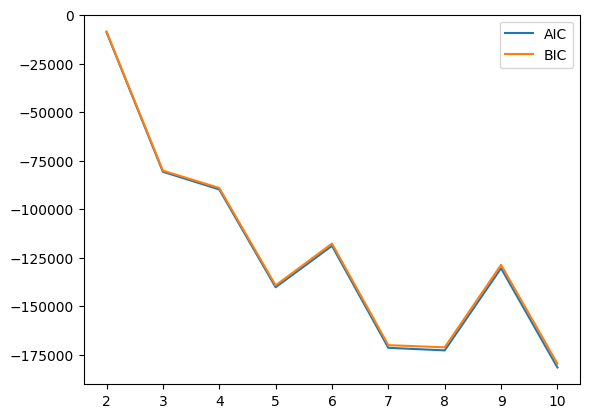

2021
0    0.445949
1    0.554051
Name: LCA_clss_pred_2, dtype: float64


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


       0      1
0  0.979  0.019
1  0.021  0.981


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.254324
1    0.424329
2    0.321347
Name: LCA_clss_pred_3, dtype: float64
       0      1    2
0  0.967  0.019  0.0
1  0.033  0.981  0.0
2  0.000  0.000  1.0


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.233045
1    0.329995
2    0.115612
3    0.321347
Name: LCA_clss_pred_4, dtype: float64
       0      1      2    3
0  0.951  0.036  0.000  0.0
1  0.049  0.956  0.031  0.0
2  0.000  0.009  0.969  0.0
3  0.000  0.000  0.000  1.0


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.076582
1    0.136550
2    0.317934
3    0.138143
4    0.330792
Name: LCA_clss_pred_5, dtype: float64
       0      1      2      3      4
0  0.971  0.000  0.000  0.005  0.005
1  0.000  0.971  0.000  0.031  0.003
2  0.000  0.000  0.997  0.000  0.001
3  0.007  0.029  0.000  0.964  0.000
4  0.022  0.001  0.003  0.000  0.991


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.206987
1    0.076695
2    0.136550
3    0.113564
4    0.328061
5    0.138143
Name: LCA_clss_pred_6, dtype: float64
     0      1      2      3      4      5
0  1.0  0.000  0.000  0.000  0.000  0.000
1  0.0  0.972  0.000  0.000  0.006  0.005
2  0.0  0.000  0.970  0.000  0.003  0.031
3  0.0  0.000  0.000  0.998  0.001  0.000
4  0.0  0.022  0.001  0.002  0.991  0.000
5  0.0  0.007  0.029  0.000  0.000  0.964


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.054620
1    0.319640
2    0.291079
3    0.089213
4    0.047906
5    0.047223
6    0.150319
Name: LCA_clss_pred_7, dtype: float64
       0      1      2      3      4      5      6
0  0.970  0.000  0.003  0.000  0.004  0.004  0.000
1  0.000  0.999  0.001  0.000  0.000  0.000  0.000
2  0.024  0.001  0.984  0.002  0.000  0.000  0.026
3  0.000  0.000  0.001  0.957  0.016  0.056  0.000
4  0.005  0.000  0.000  0.012  0.946  0.022  0.001
5  0.001  0.000  0.000  0.028  0.033  0.918  0.000
6  0.000  0.000  0.011  0.000  0.001  0.000  0.972


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.041648
1    0.025944
2    0.141215
3    0.095130
4    0.048361
5    0.289599
6    0.320096
7    0.038006
Name: LCA_clss_pred_8, dtype: float64
       0      1      2      3      4      5      6      7
0  0.927  0.000  0.002  0.020  0.000  0.000  0.000  0.047
1  0.000  0.918  0.008  0.003  0.000  0.000  0.000  0.000
2  0.006  0.061  0.965  0.000  0.000  0.009  0.000  0.000
3  0.044  0.021  0.000  0.966  0.000  0.002  0.000  0.025
4  0.000  0.000  0.000  0.000  0.974  0.003  0.000  0.005
5  0.000  0.000  0.024  0.001  0.017  0.986  0.001  0.000
6  0.000  0.000  0.000  0.000  0.000  0.001  0.999  0.000
7  0.023  0.000  0.000  0.010  0.009  0.000  0.000  0.923


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.039372
1    0.088530
2    0.066113
3    0.232249
4    0.053482
5    0.281179
6    0.075102
7    0.137119
8    0.026855
Name: LCA_clss_pred_9, dtype: float64
       0      1      2      3      4      5      6      7      8
0  0.971  0.000  0.000  0.000  0.004  0.001  0.000  0.000  0.012
1  0.000  0.941  0.032  0.000  0.040  0.000  0.024  0.000  0.000
2  0.000  0.019  0.933  0.000  0.007  0.001  0.034  0.000  0.000
3  0.000  0.000  0.000  0.995  0.000  0.003  0.000  0.004  0.000
4  0.009  0.020  0.004  0.000  0.949  0.000  0.000  0.000  0.000
5  0.013  0.000  0.000  0.005  0.000  0.992  0.005  0.000  0.020
6  0.000  0.020  0.031  0.000  0.000  0.001  0.937  0.000  0.000
7  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.996  0.000
8  0.007  0.000  0.000  0.000  0.000  0.002  0.000  0.000  0.968
0    0.057010
1    0.044948
2    0.061561
3    0.033113
4    0.032886
5    0.317934
6    0.316909
7    0.038234
8    0.051889
9    0.045517
Name: LCA_clss_pred_10, dtype: float64
       

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


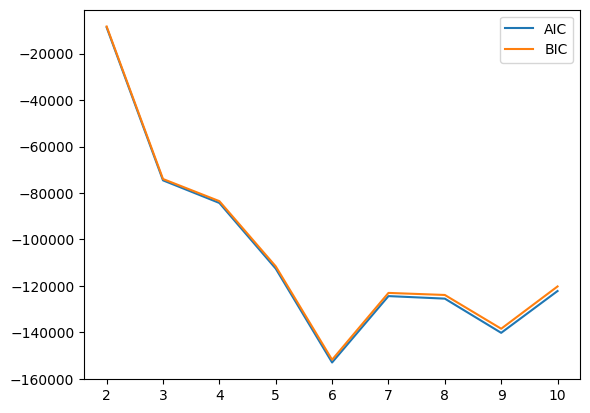

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)


2022
0    0.575306
1    0.424694
Name: LCA_clss_pred_2, dtype: float64


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


       0      1
0  0.981  0.022
1  0.019  0.978


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.207105
1    0.276179
2    0.516715
Name: LCA_clss_pred_3, dtype: float64
       0      1      2
0  0.971  0.000  0.011
1  0.000  0.966  0.018
2  0.029  0.034  0.972


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.272103
1    0.237041
2    0.139546
3    0.351310
Name: LCA_clss_pred_4, dtype: float64
     0     1      2      3
0  1.0  0.00  0.000  0.000
1  0.0  0.95  0.000  0.034
2  0.0  0.00  0.972  0.010
3  0.0  0.05  0.028  0.957


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.104601
1    0.214560
2    0.255096
3    0.271986
4    0.153757
Name: LCA_clss_pred_5, dtype: float64
       0      1      2    3      4
0  0.975  0.005  0.000  0.0  0.015
1  0.006  0.930  0.036  0.0  0.045
2  0.000  0.041  0.955  0.0  0.014
3  0.000  0.000  0.000  1.0  0.000
4  0.019  0.024  0.009  0.0  0.925


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.267327
1    0.344787
2    0.079557
3    0.075946
4    0.162609
5    0.069773
Name: LCA_clss_pred_6, dtype: float64
       0      1      2      3      4      5
0  0.996  0.001  0.000  0.000  0.000  0.000
1  0.004  0.994  0.005  0.023  0.000  0.000
2  0.000  0.002  0.944  0.000  0.022  0.000
3  0.000  0.003  0.000  0.969  0.000  0.007
4  0.000  0.000  0.051  0.000  0.955  0.045
5  0.000  0.000  0.000  0.008  0.023  0.948


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.068957
1    0.267327
2    0.068259
3    0.076529
4    0.076878
5    0.343273
6    0.098777
Name: LCA_clss_pred_7, dtype: float64
       0      1      2      3      4      5      6
0  0.907  0.000  0.026  0.014  0.000  0.000  0.051
1  0.000  0.996  0.000  0.000  0.000  0.001  0.000
2  0.021  0.000  0.945  0.000  0.008  0.000  0.011
3  0.014  0.000  0.000  0.943  0.000  0.002  0.019
4  0.000  0.000  0.007  0.000  0.971  0.004  0.000
5  0.000  0.004  0.000  0.006  0.021  0.993  0.000
6  0.059  0.000  0.022  0.038  0.000  0.000  0.919


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.142691
1    0.053465
2    0.036575
3    0.056028
4    0.054514
5    0.268957
6    0.070239
7    0.317531
Name: LCA_clss_pred_8, dtype: float64
       0      1      2      3      4      5      6      7
0  0.978  0.000  0.000  0.006  0.000  0.000  0.000  0.009
1  0.000  0.976  0.005  0.000  0.000  0.000  0.000  0.002
2  0.000  0.006  0.948  0.016  0.009  0.000  0.000  0.000
3  0.002  0.000  0.033  0.924  0.022  0.000  0.021  0.000
4  0.000  0.000  0.014  0.030  0.918  0.000  0.033  0.000
5  0.000  0.000  0.000  0.000  0.000  0.999  0.000  0.001
6  0.000  0.000  0.000  0.024  0.050  0.000  0.946  0.001
7  0.020  0.017  0.000  0.000  0.000  0.001  0.000  0.986


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


0    0.330693
1    0.078043
2    0.074549
3    0.063949
4    0.167385
5    0.103320
6    0.086546
7    0.058474
8    0.037041
Name: LCA_clss_pred_9, dtype: float64
       0      1      2      3    4      5      6      7      8
0  0.994  0.000  0.000  0.028  0.0  0.005  0.000  0.000  0.005
1  0.000  0.938  0.022  0.011  0.0  0.000  0.033  0.000  0.000
2  0.000  0.019  0.903  0.000  0.0  0.000  0.043  0.033  0.000
3  0.004  0.011  0.000  0.955  0.0  0.000  0.000  0.000  0.024
4  0.000  0.000  0.000  0.000  1.0  0.000  0.000  0.000  0.000
5  0.001  0.000  0.000  0.000  0.0  0.995  0.000  0.000  0.000
6  0.000  0.032  0.053  0.000  0.0  0.000  0.914  0.020  0.000
7  0.000  0.000  0.022  0.000  0.0  0.000  0.011  0.947  0.000
8  0.001  0.000  0.000  0.006  0.0  0.000  0.000  0.000  0.971
0    0.120792
1    0.247874
2    0.045778
3    0.138847
4    0.065929
5    0.035061
6    0.021899
7    0.061969
8    0.043331
9    0.218521
Name: LCA_clss_pred_10, dtype: float64
       0      1      2     

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_23144\1211899298.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


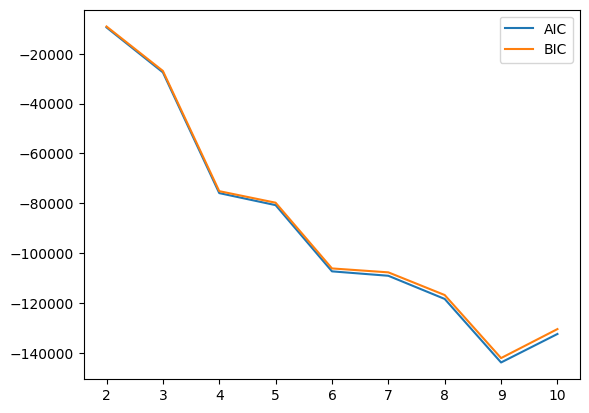

In [11]:
cols_LCA = plan_cols[:-1] 

dict_df_models_agnos = {}
for a in range(2018,2023):
    
    print(a)
    df_models_agno = df_models[df_models.agno == a]
    
    aic_list = []
    bic_list = []
    
    for col in [cols_LCA]:
        df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)

    for n_clust in [2,3,4,5,6,7,8,9,10]:
        # Create a continuous latent class model
        model = StepMix(n_components=n_clust, measurement="continuous", verbose=0, random_state=123)
        # Fit to data
        model.fit(df_models_agno[cols_LCA])
        # Save class membership predictions to df
        predictions = model.predict(df_models_agno[cols_LCA])
        df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions

        print(df_models_agno['LCA_clss_pred_'+str(n_clust)].value_counts().sort_index()/len(df_models_agno))

        aic_list+=[model.aic(df_models_agno[cols_LCA])]
        bic_list+=[model.bic(df_models_agno[cols_LCA])]

        df = pd.DataFrame(model.predict_proba(df_models_agno[cols_LCA]))
        df['clase'] = model.predict(df_models_agno[cols_LCA])
        vals_list = []
        for c in range(n_clust):
            vals_list += [list(np.round(df[df.clase == c].mean(),3).values)]
        df_probs = pd.DataFrame(vals_list).T
        df_probs = df_probs.iloc[df_probs.index[:-1],:]
        print(df_probs)
        
    dict_df_models_agnos[a] = df_models_agno
    
    print(len(df_models_agno))
    plt.plot([2,3,4,5,6,7,8,9,10], aic_list, label='AIC')
    plt.plot([2,3,4,5,6,7,8,9,10], bic_list, label = 'BIC')
    plt.legend()
    plt.show()

In [12]:
dict_label_old = {2018: {3: 'Completo', 1: 'Incipiente', 2: 'Intermedio'},
                  2019: {1: 'Intermedio', 2: 'Completo', 3: 'Incipiente'},
                  2020: {3: 'Intermedio', 1: 'Completo', 2: 'Incipiente'},
                  2021: {3: 'Incipiente', 2: 'Intermedio', 1: 'Completo'}}

dict_label_new = {1: 'Focalizado', 2: 'Incipiente', 3:'Completo' , 4:'Intermedio'}

2018
0
[0.25196766 0.34776201 0.31877474 0.29433684 0.13399302 0.30235767
 0.59521137 0.26095553 0.37178909 0.34771521 0.31156041 0.13399302
 0.32146227]
1
[0.83245201 0.70188042 0.74032215 0.7870934  0.82895284 0.74787509
 0.34858753 0.82287471 0.68943514 0.74911528 0.77627316 0.81502108
 0.75668825]
2
[0.44056009 0.46491716 0.45821124 0.44363059 0.51268646 0.46325097
 0.53778534 0.44118364 0.45840603 0.43558599 0.44014346 0.52134577
 0.44644532]


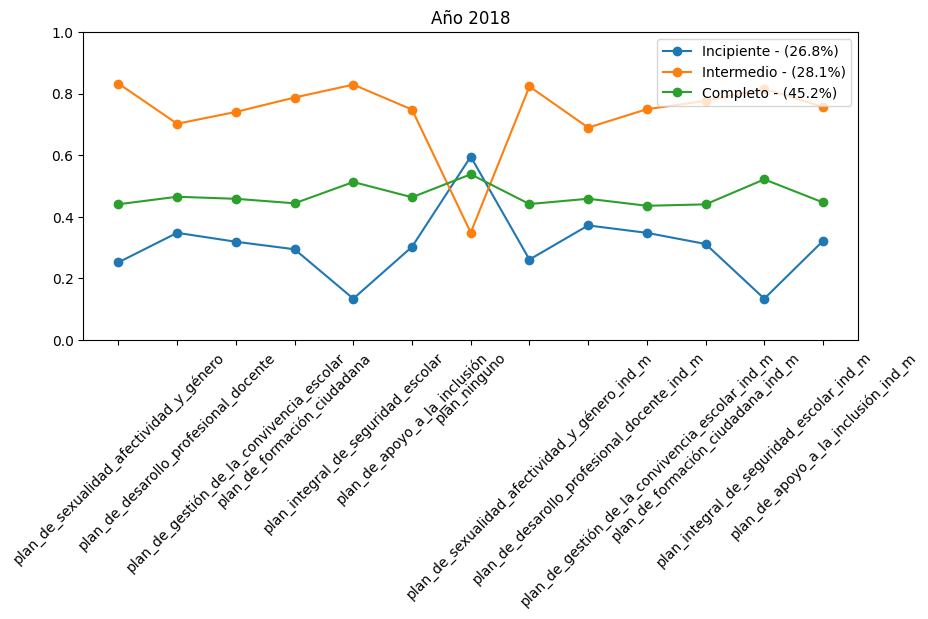

2019
0
[0.82778415 0.70818398 0.72957795 0.78231427 0.81927652 0.73806532
 0.3661651  0.81580585 0.69340019 0.73605369 0.77028426 0.803069
 0.75010376]
1
[0.50263879 0.45879684 0.45498061 0.44932731 0.44531081 0.46764479
 0.54901974 0.51072597 0.44865093 0.42651589 0.44643497 0.44759462
 0.44826868]
2
[0.13368519 0.33760446 0.32020949 0.27118688 0.23691618 0.29010294
 0.5678777  0.13368519 0.37054707 0.35964231 0.28921442 0.25108812
 0.3085133 ]


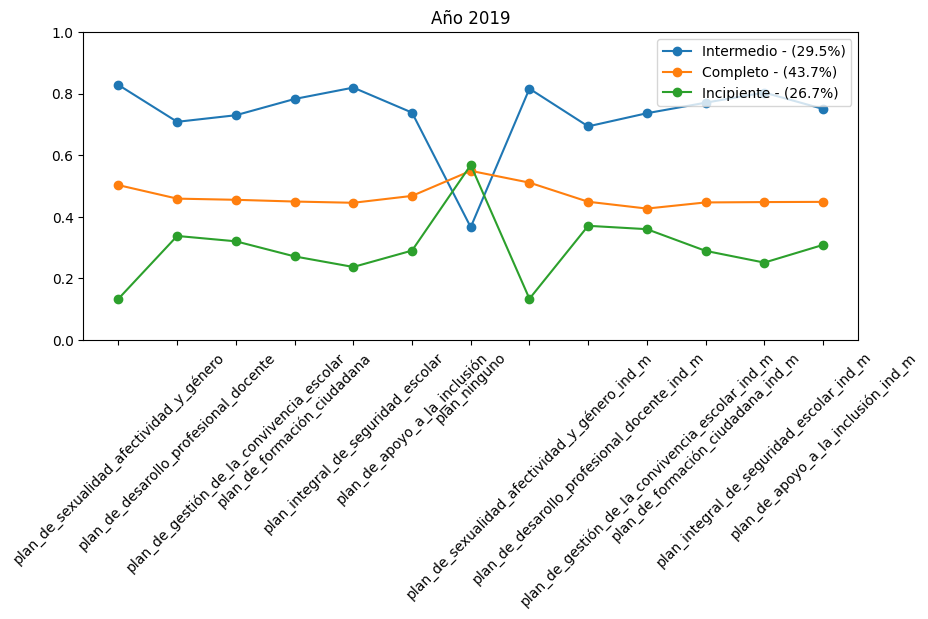

2020
0
[0.85416459 0.73280581 0.75984411 0.8169649  0.82126259 0.76504538
 0.36296134 0.84407028 0.71295989 0.74957373 0.80742861 0.78166587
 0.76623938]
1
[0.1760055  0.34563406 0.32784184 0.29729196 0.31128552 0.31335303
 0.56306806 0.1760055  0.37334487 0.3631205  0.30522045 0.34502672
 0.33127079]
2
[0.5703145  0.49556867 0.49492001 0.4874615  0.47280652 0.50436825
 0.52687927 0.57630285 0.48337024 0.47049427 0.48626009 0.46710834
 0.4881598 ]


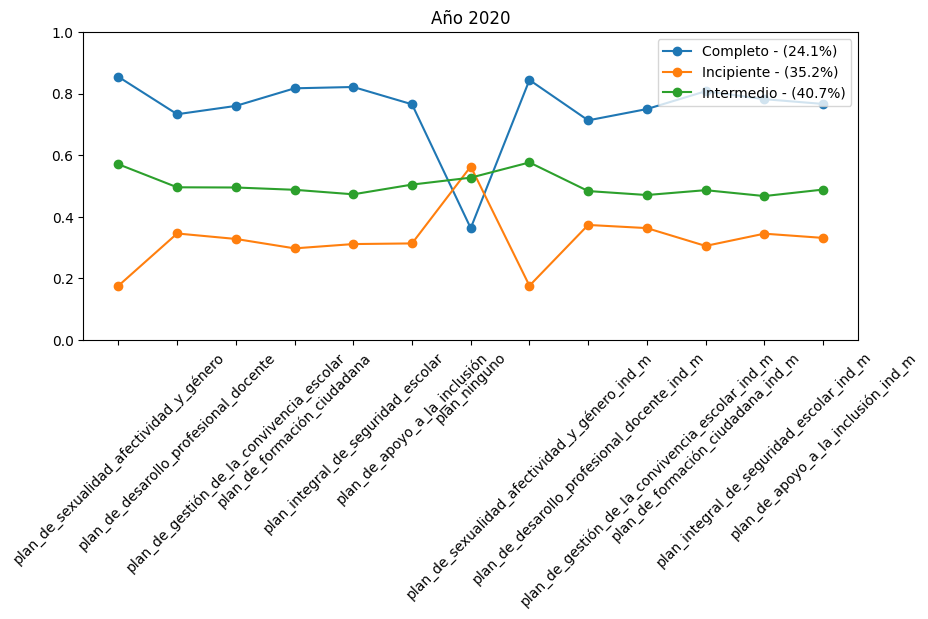

2021
0
[0.84610757 0.72866078 0.75446936 0.79863407 0.81052187 0.75791062
 0.35521746 0.83347597 0.71613424 0.74855884 0.79188246 0.77623175
 0.76955738]
1
[0.54962364 0.48758443 0.48209361 0.47851845 0.47103474 0.48701982
 0.52884594 0.55719447 0.47659417 0.46230514 0.47751459 0.46961952
 0.46909477]
2
[0.16073054 0.33560228 0.32242702 0.2921946  0.29266822 0.31319861
 0.57667226 0.16073054 0.36002843 0.35323481 0.29886359 0.32167523
 0.32765045]


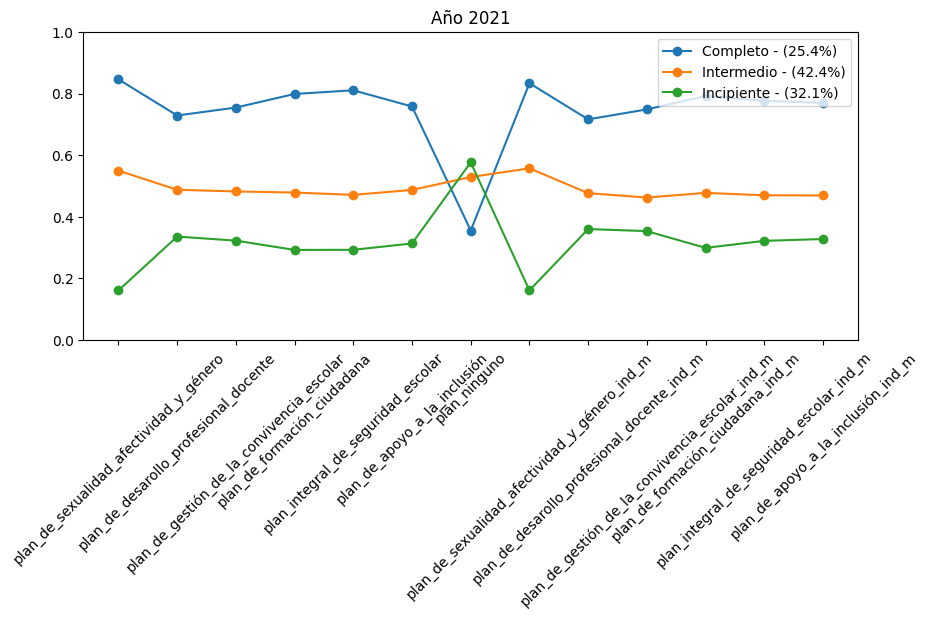

2022
0
[0.13616773 0.32330487 0.31938452 0.27022156 0.26484463 0.29404898
 0.58555204 0.13616773 0.34765602 0.34980588 0.27819745 0.28644635
 0.30943264]
1
[0.44399852 0.40915107 0.36553657 0.3945782  0.33806047 0.37241517
 0.64113085 0.45074479 0.39277581 0.3188478  0.3930248  0.34069094
 0.34093114]
2
[0.90604672 0.80677945 0.81038355 0.88848736 0.89221859 0.81472008
 0.33620599 0.88870929 0.78111996 0.81114588 0.87166395 0.86170554
 0.82601662]
3
[0.65846526 0.57646406 0.60749713 0.59495621 0.63577322 0.62075664
 0.40373819 0.6608     0.57884451 0.61513443 0.59650924 0.62938728
 0.62559767]


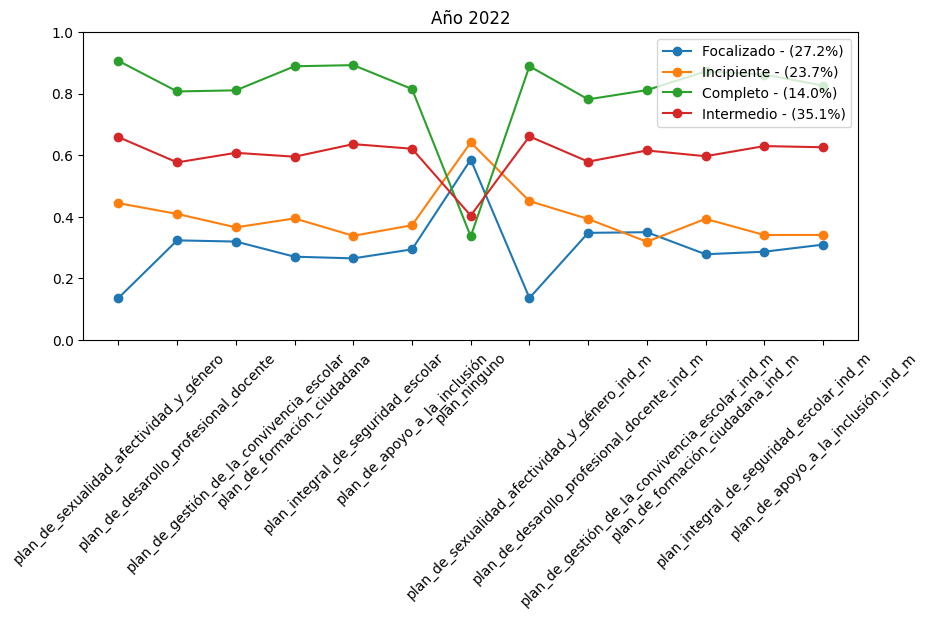

In [13]:
n_optimal_dict = {2018:3, 2019:3, 2020:3, 2021:3, 2022:4}

for a in range(2018,2023):
    print(a)
    n_optimal = n_optimal_dict[a]
    df_models_agno = dict_df_models_agnos[a]
    _,ax = plt.subplots(figsize=(10,4))
    for c in range(n_optimal):
        print(c)
        #if a != 2022:
        #    c+=1
        data_c = df_models_agno[df_models_agno['LCA_clss_pred_' + str(n_optimal)] == c]
        vals= data_c[cols_LCA].mean().values
        print(vals)
        ax.set_ylim([0,1])
        if a !=2022:
            ax.plot(range(len(cols_LCA)),vals,'-o', label =  dict_label_old[a][c+1] + ' - (' + str(np.round(100*len(data_c)/len(df_models_agno),1)) + '%)')
        else:
            
            ax.plot(range(len(cols_LCA)),vals,'-o', label =  dict_label_new[c+1]+ ' - (' + str(np.round(100*len(data_c)/len(df_models_agno),1)) + '%)')
            
        ax.set_xticks(range(len(cols_LCA)))
        ax.set_xticklabels([x[:-4] for x in cols_LCA], rotation=45)
        ax.set_title('Año ' + str(a))
    plt.legend(loc = 'upper right')
    plt.show()

#### Comparar respecto a variables fuera del PME

In [42]:
# Pasar dependencia a binario y otros cambias a columnas 
for a in range(2018,2023):
    df_models_agno = dict_df_models_agnos[a]    
    for val in df_models_agno.dependencia.unique():
        new_col = 'dependencia_' + val
        new_col = new_col.replace(' ','_')
        df_models_agno.loc[:,new_col] = (df_models_agno.dependencia == val).astype(int)
        
    for col in ['n_docentes','horas_contrato','horas_direct','horas_tec_ped','horas_aula']:
        df_models_agno.loc[:, col + '_por_estudiante'] = df_models_agno[col]/df_models_agno.total_matricula
        
    dict_df_models_agnos[a] = df_models_agno

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\565886530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,new_col] = (df_models_agno.dependencia == val).astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\565886530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,new_col] = (df_models_agno.dependencia == val).astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\565886530.py:7: SettingWithCopyWarning: 
A value is tr

In [13]:
# Atributos a analizar 
sum_cols = [
            'dependencia_Servicio_locales_de_Educacion',
            'dependencia_Particular_Subvencionado',
            'dependencia_Corporación_Municipal',
            'dependencia_Municipal_DAEM',
            'dependencia_Corporación_Privada_o_de_administración_delegada',
            'rural_rbd',
            'parvularia_ind',
            'básica_niños_ind',
            'media_hc_jóvenes_ind',
            'media_tp_y_artística_jóvenes_ind',
            'básica_adultos_ind',
            'media_hc_adultos_ind',
            'media_tp_y_artística_adultos_ind',
            'n_docentes_por_estudiante', 
            'horas_contrato_por_estudiante',
            'horas_direct_por_estudiante', 
            'horas_tec_ped_por_estudiante',
            'horas_aula_por_estudiante',
            'ano_servicio_sistema',
            'total_niveles',
            'total_matricula',
            'asistencia',
            'prioritario_alu',
            'idps_am',
            'idps_cc',
            'idps_hv',
            'idps_pf',
            'prom_idps',
            'prom_lect',
            'prom_mate']


In [43]:
dict_tablas = {}
# Crear resumen respecto a datos 
for a in range(2018,2023):
    df_models_agno = dict_df_models_agnos[a]    
    vals_list = []
    for c in range(n_optimal_dict[a]):
        data_c = df_models_agno[df_models_agno['LCA_clss_pred_' + str(n_optimal_dict[a])] == c]
        vals= data_c[sum_cols].mean().values
        vals_list += [vals]

    df = pd.DataFrame(vals_list).T
    df.index = sum_cols
    if a !=2022:
        df = df[[0,1,2]]
        df.columns = [x+1 for x in df.columns]
        df = df.rename(columns = dict_label_old[a])
        df = df[['Incipiente','Intermedio','Completo']]
    else:
        df = df[[0,1,3,2]]
        df.columns = [x+1 for x in df.columns]
        df = df.rename(columns = dict_label_new)
        df = df[['Focalizado','Incipiente','Intermedio','Completo']]
    # Porcentajes
    for case in ['dependencia_Servicio_locales_de_Educacion',
            'dependencia_Particular_Subvencionado',
            'dependencia_Corporación_Municipal',
            'dependencia_Municipal_DAEM',
            'dependencia_Corporación_Privada_o_de_administración_delegada',
            'rural_rbd',
            'parvularia_ind',
            'básica_niños_ind',
            'media_hc_jóvenes_ind',
            'media_tp_y_artística_jóvenes_ind',
            'básica_adultos_ind',
            'media_hc_adultos_ind',
            'media_tp_y_artística_adultos_ind',
            'prioritario_alu']:
    
        df.loc[case,:] = 100*df.loc[case,:]
    
    df = np.round(df,2)
    df.index = [x.replace('_',' ') for x in df.index]
    
    dict_tablas[a] = df
    display(df)

,Incipiente,Intermedio,Completo
dependencia Servicio locales de Educacion,6.79,7.08,7.47
dependencia Particular Subvencionado,47.47,42.05,36.83
dependencia Corporación Municipal,9.45,11.13,9.61
dependencia Municipal DAEM,35.55,39.30,45.48
dependencia Corporación Privada o de administración delegada,0.73,0.44,0.61
rural rbd,43.41,37.22,38.31
parvularia ind,56.32,64.13,63.30
básica niños ind,81.49,86.43,85.41
media hc jóvenes ind,16.11,21.74,23.77
media tp y artística jóvenes ind,7.19,10.30,12.89


,Incipiente,Intermedio,Completo
dependencia Servicio locales de Educacion,6.68,7.27,7.49
dependencia Particular Subvencionado,46.66,43.11,36.70
dependencia Corporación Municipal,9.01,10.84,10.06
dependencia Municipal DAEM,36.52,38.45,45.44
dependencia Corporación Privada o de administración delegada,1.13,0.33,0.30
rural rbd,43.66,36.81,37.34
parvularia ind,55.47,64.76,65.44
básica niños ind,80.24,86.28,85.65
media hc jóvenes ind,15.22,22.73,24.50
media tp y artística jóvenes ind,6.21,10.44,12.55


,Incipiente,Intermedio,Completo
dependencia Servicio locales de Educacion,6.45,7.33,8.17
dependencia Particular Subvencionado,43.76,44.17,37.95
dependencia Corporación Municipal,9.96,11.12,8.46
dependencia Municipal DAEM,39.27,36.82,45.25
dependencia Corporación Privada o de administración delegada,0.55,0.56,0.17
rural rbd,46.63,31.86,33.31
parvularia ind,55.56,68.75,67.44
básica niños ind,84.03,85.29,84.99
media hc jóvenes ind,15.09,26.06,25.90
media tp y artística jóvenes ind,6.61,12.06,12.40


,Incipiente,Intermedio,Completo
dependencia Servicio locales de Educacion,7.15,7.15,7.41
dependencia Particular Subvencionado,45.22,44.34,38.04
dependencia Corporación Municipal,9.21,11.25,8.59
dependencia Municipal DAEM,37.96,36.71,45.56
dependencia Corporación Privada o de administración delegada,0.46,0.55,0.40
rural rbd,45.86,31.57,33.71
parvularia ind,57.65,67.76,66.52
básica niños ind,83.00,85.17,84.84
media hc jóvenes ind,14.59,27.09,25.68
media tp y artística jóvenes ind,6.23,12.14,11.71


,Focalizado,Incipiente,Intermedio,Completo
dependencia Servicio locales de Educacion,6.63,8.23,7.02,6.43
dependencia Particular Subvencionado,46.26,45.09,39.45,35.11
dependencia Corporación Municipal,9.11,11.81,9.64,8.93
dependencia Municipal DAEM,37.27,34.37,43.64,49.22
dependencia Corporación Privada o de administración delegada,0.73,0.50,0.25,0.31
rural rbd,44.84,28.31,37.24,33.70
parvularia ind,59.44,68.61,65.23,67.55
básica niños ind,81.80,84.32,86.38,84.64
media hc jóvenes ind,15.12,28.38,24.44,25.55
media tp y artística jóvenes ind,6.90,12.13,10.75,12.70


In [15]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(r'Tablas\tablas_latent_class.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet
for var in dict_tablas.keys():
    print(var)
    dict_tablas[var].to_excel(writer, sheet_name= str(var))
# Close the Pandas Excel writer and output the Excel file.
writer.close()

2018
2019
2020
2021
2022


#### Consolidar bbdd

In [61]:
for a in range(2018,2023):
    df_models_agno = dict_df_models_agnos[a]    
    
    df_models_agno['LCA_PLANES_' + str(a)] = df_models_agno['LCA_clss_pred_' + str(n_optimal_dict[a])] + 1
    if a <2022:
        df_models_agno['LCA_PLANES_' + str(a)] = df_models_agno['LCA_PLANES_' + str(a)].replace(dict_label_old[a])
    else:
        df_models_agno['LCA_PLANES_' + str(a)] = df_models_agno['LCA_PLANES_' + str(a)].replace(dict_label_new)
    
    df_models_agno = df_models_agno[[x for x in df_models_agno.columns if 'clss_pred_' not in x]]
       
    
    if a == 2018:
        df_models_total = df_models_agno.copy()
    else:
        df_models_total = pd.concat([df_models_total,df_models_agno], axis=0)


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\2779144833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno['LCA_PLANES_' + str(a)] = df_models_agno['LCA_clss_pred_' + str(n_optimal_dict[a])] + 1
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\2779144833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno['LCA_PLANES_' + str(a)] = df_models_agno['LCA_PLANES_' + str(a)].replace(dict_label_old[a])
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\27

#### Guardar

In [76]:
df_models_total.to_csv(r'Datos\Finales\Nivel_PME\df_planificacion_implementacion_total_2018_2022_PME_FINAL_CLASES.csv',index=False)

### Especificación 2: Según TEMAS para LICEOS unicamente

2018
0    0.141553
1    0.858447
Name: LCA_clss_pred_2, dtype: float64
     0      1
0  1.0  0.001
1  0.0  0.999
0    0.091324
1    0.812785
2    0.095890
Name: LCA_clss_pred_3, dtype: float64
     0    1      2
0  1.0  0.0  0.074
1  0.0  1.0  0.000
2  0.0  0.0  0.926
0    0.063927
1    0.812785
2    0.050228
3    0.073059
Name: LCA_clss_pred_4, dtype: float64
       0    1    2    3
0  0.999  0.0  0.0  0.0
1  0.000  1.0  0.0  0.0
2  0.000  0.0  1.0  0.0
3  0.001  0.0  0.0  1.0
0    0.063927
1    0.068493
2    0.004566
3    0.168950
4    0.694064
Name: LCA_clss_pred_5, dtype: float64
     0      1    2    3    4
0  1.0  0.001  0.0  0.0  0.0
1  0.0  0.999  0.0  0.0  0.0
2  0.0  0.000  1.0  0.0  0.0
3  0.0  0.000  0.0  1.0  0.0
4  0.0  0.000  0.0  0.0  1.0
0    0.694064
1    0.018265
2    0.036530
3    0.118721
4    0.050228
5    0.082192
Name: LCA_clss_pred_6, dtype: float64
     0    1    2    3    4    5
0  1.0  0.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0 

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a co

0    0.004566
1    0.050228
2    0.013699
3    0.694064
4    0.041096
5    0.009132
6    0.009132
7    0.041096
8    0.105023
9    0.031963
Name: LCA_clss_pred_10, dtype: float64
     0    1      2    3    4     5    6    7      8    9
0  1.0  0.0  0.000  0.0  0.0  0.00  0.0  0.0  0.000  0.0
1  0.0  1.0  0.000  0.0  0.0  0.00  0.0  0.0  0.000  0.0
2  0.0  0.0  0.768  0.0  0.0  0.00  0.0  0.0  0.016  0.0
3  0.0  0.0  0.000  1.0  0.0  0.00  0.0  0.0  0.000  0.0
4  0.0  0.0  0.000  0.0  1.0  0.00  0.0  0.0  0.000  0.0
5  0.0  0.0  0.000  0.0  0.0  0.83  0.0  0.0  0.000  0.0
6  0.0  0.0  0.000  0.0  0.0  0.00  1.0  0.0  0.000  0.0
7  0.0  0.0  0.000  0.0  0.0  0.00  0.0  1.0  0.000  0.0
8  0.0  0.0  0.232  0.0  0.0  0.00  0.0  0.0  0.984  0.0
9  0.0  0.0  0.000  0.0  0.0  0.17  0.0  0.0  0.000  1.0


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


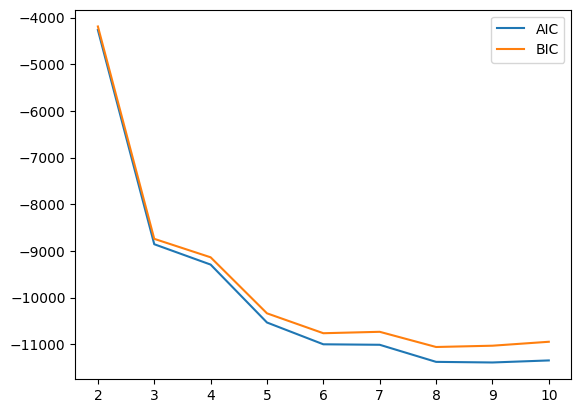

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a co

2019
0    0.136564
1    0.863436
Name: LCA_clss_pred_2, dtype: float64
     0    1
0  1.0  0.0
1  0.0  1.0
0    0.110132
1    0.841410
2    0.048458
Name: LCA_clss_pred_3, dtype: float64
     0    1      2
0  1.0  0.0  0.000
1  0.0  1.0  0.001
2  0.0  0.0  0.999
0    0.057269
1    0.718062
2    0.185022
3    0.039648
Name: LCA_clss_pred_4, dtype: float64
     0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0


C:\Users\JoaquinFarina\anaconda3\lib\site-packages\stepmix\stepmix.py:812: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

0    0.035242
1    0.145374
2    0.052863
3    0.718062
4    0.048458
Name: LCA_clss_pred_5, dtype: float64
     0    1    2    3    4
0  1.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  0.0  0.0  1.0
0    0.030837
1    0.030837
2    0.110132
3    0.061674
4    0.718062
5    0.048458
Name: LCA_clss_pred_6, dtype: float64
     0    1    2    3    4    5
0  1.0  0.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0  0.0
4  0.0  0.0  0.0  0.0  1.0  0.0
5  0.0  0.0  0.0  0.0  0.0  1.0
0    0.092511
1    0.035242
2    0.008811
3    0.004405
4    0.718062
5    0.030837
6    0.110132
Name: LCA_clss_pred_7, dtype: float64
     0    1    2    3    4    5    6
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0

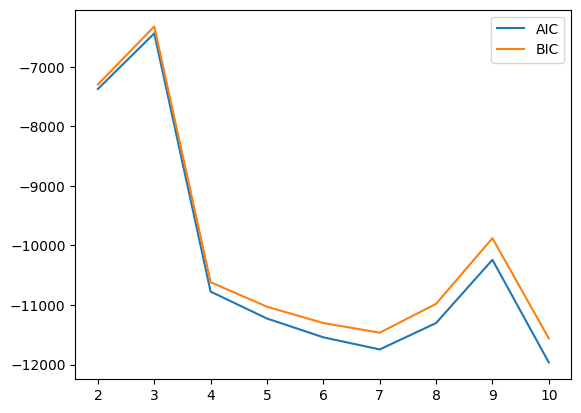

2020


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)
C:\Users\JoaquinFarina\anaconda3\lib\site-packages\stepmix\stepmix.py:812: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

0    0.879167
1    0.120833
Name: LCA_clss_pred_2, dtype: float64
     0    1
0  1.0  0.0
1  0.0  1.0
0    0.904167
1    0.070833
2    0.025000
Name: LCA_clss_pred_3, dtype: float64
     0    1    2
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0
0    0.862500
1    0.016667
2    0.112500
3    0.008333
Name: LCA_clss_pred_4, dtype: float64
     0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0
0    0.008333
1    0.041667
2    0.862500
3    0.079167
4    0.008333
Name: LCA_clss_pred_5, dtype: float64
     0    1    2    3    4
0  1.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  0.0  0.0  1.0
0    0.008333
1    0.016667
2    0.041667
3    0.862500
5    0.070833
Name: LCA_clss_pred_6, dtype: float64
     0    1      2    3   4    5
0  1.0  0.0  0.000  0.0 NaN  0.0
1  0.0  1.0  0.000  0.0 NaN  0.0
2  0.0  0.0  0.803  0.0 NaN  0.0
3  0.0  0.0  0.000  1.0 NaN  0.0
4  

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


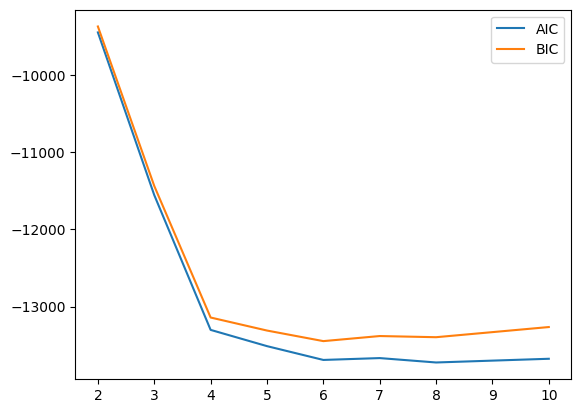

2021
0    0.94
1    0.06
Name: LCA_clss_pred_2, dtype: float64
     0    1
0  1.0  0.0
1  0.0  1.0
0    0.936
1    0.024
2    0.040
Name: LCA_clss_pred_3, dtype: float64
     0    1    2
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0
0    0.004
1    0.032
2    0.868
3    0.096
Name: LCA_clss_pred_4, dtype: float64
     0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0
0    0.868
1    0.016
2    0.068
3    0.020
4    0.028
Name: LCA_clss_pred_5, dtype: float64
     0    1    2    3    4
0  1.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  0.0  0.0  1.0


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a co

0    0.028
2    0.056
3    0.012
4    0.036
5    0.868
Name: LCA_clss_pred_6, dtype: float64
     0   1    2      3    4      5
0  1.0 NaN  0.0  0.000  0.0  0.000
1  0.0 NaN  0.0  0.000  0.0  0.024
2  0.0 NaN  1.0  0.037  0.0  0.000
3  0.0 NaN  0.0  0.963  0.0  0.000
4  0.0 NaN  0.0  0.000  1.0  0.000
5  0.0 NaN  0.0  0.000  0.0  0.976
0    0.016
1    0.008
2    0.068
3    0.028
5    0.868
6    0.012
Name: LCA_clss_pred_7, dtype: float64
     0    1    2    3   4      5    6
0  1.0  0.0  0.0  0.0 NaN  0.000  0.0
1  0.0  1.0  0.0  0.0 NaN  0.000  0.0
2  0.0  0.0  1.0  0.0 NaN  0.000  0.0
3  0.0  0.0  0.0  1.0 NaN  0.000  0.0
4  0.0  0.0  0.0  0.0 NaN  0.004  0.0
5  0.0  0.0  0.0  0.0 NaN  0.996  0.0
6  0.0  0.0  0.0  0.0 NaN  0.000  1.0
0    0.868
1    0.012
2    0.020
3    0.004
4    0.028
5    0.068
Name: LCA_clss_pred_8, dtype: float64


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a 

       0    1    2    3    4    5   6   7
0  0.557  0.0  0.0  0.0  0.0  0.0 NaN NaN
1  0.000  1.0  0.0  0.0  0.0  0.0 NaN NaN
2  0.000  0.0  1.0  0.0  0.0  0.0 NaN NaN
3  0.000  0.0  0.0  1.0  0.0  0.0 NaN NaN
4  0.000  0.0  0.0  0.0  1.0  0.0 NaN NaN
5  0.000  0.0  0.0  0.0  0.0  1.0 NaN NaN
6  0.443  0.0  0.0  0.0  0.0  0.0 NaN NaN
7  0.000  0.0  0.0  0.0  0.0  0.0 NaN NaN
0    0.868
1    0.028
3    0.012
4    0.004
5    0.016
6    0.004
8    0.068
Name: LCA_clss_pred_9, dtype: float64
       0      1   2    3    4    5    6   7    8
0  0.917  0.000 NaN  0.0  0.0  0.0  0.0 NaN  0.0
1  0.000  0.984 NaN  0.0  0.0  0.0  0.0 NaN  0.0
2  0.000  0.016 NaN  0.0  0.0  0.0  0.0 NaN  0.0
3  0.000  0.000 NaN  1.0  0.0  0.0  0.0 NaN  0.0
4  0.000  0.000 NaN  0.0  1.0  0.0  0.0 NaN  0.0
5  0.000  0.000 NaN  0.0  0.0  1.0  0.0 NaN  0.0
6  0.000  0.000 NaN  0.0  0.0  0.0  1.0 NaN  0.0
7  0.083  0.000 NaN  0.0  0.0  0.0  0.0 NaN  0.0
8  0.000  0.000 NaN  0.0  0.0  0.0  0.0 NaN  1.0
1    0.004
3    0

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions


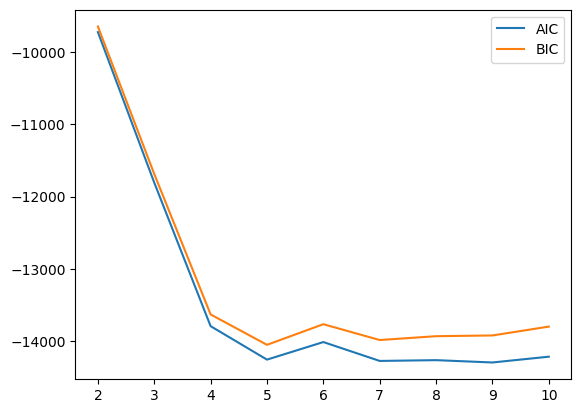

2022
0    0.051793
1    0.948207
Name: LCA_clss_pred_2, dtype: float64
     0    1
0  1.0  0.0
1  0.0  1.0
0    0.063745
1    0.027888
2    0.908367
Name: LCA_clss_pred_3, dtype: float64
     0    1    2
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0
0    0.043825
1    0.848606
2    0.059761
3    0.047809
Name: LCA_clss_pred_4, dtype: float64
     0    1    2    3
0  1.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0
0    0.019920
1    0.848606
2    0.087649
3    0.003984
4    0.039841
Name: LCA_clss_pred_5, dtype: float64
     0    1    2    3    4
0  1.0  0.0  0.0  0.0  0.0
1  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  0.0  0.0  1.0


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\1705330488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a co

0    0.031873
1    0.023904
2    0.011952
3    0.848606
4    0.015936
5    0.067729
Name: LCA_clss_pred_6, dtype: float64
       0    1      2    3      4    5
0  0.947  0.0  0.118  0.0  0.000  0.0
1  0.000  1.0  0.000  0.0  0.000  0.0
2  0.053  0.0  0.881  0.0  0.000  0.0
3  0.000  0.0  0.000  1.0  0.000  0.0
4  0.000  0.0  0.000  0.0  0.999  0.0
5  0.000  0.0  0.000  0.0  0.000  1.0
0    0.035857
1    0.003984
2    0.015936
3    0.011952
4    0.043825
5    0.039841
6    0.848606
Name: LCA_clss_pred_7, dtype: float64
     0    1      2    3    4    5    6
0  1.0  0.0  0.000  0.0  0.0  0.0  0.0
1  0.0  1.0  0.000  0.0  0.0  0.0  0.0
2  0.0  0.0  0.953  0.0  0.0  0.0  0.0
3  0.0  0.0  0.000  1.0  0.0  0.0  0.0
4  0.0  0.0  0.047  0.0  1.0  0.0  0.0
5  0.0  0.0  0.000  0.0  0.0  1.0  0.0
6  0.0  0.0  0.000  0.0  0.0  0.0  1.0
1    0.003984
2    0.019920
3    0.059761
4    0.039841
6    0.027888
7    0.848606
Name: LCA_clss_pred_8, dtype: float64
    0    1    2    3    4   5    6      7


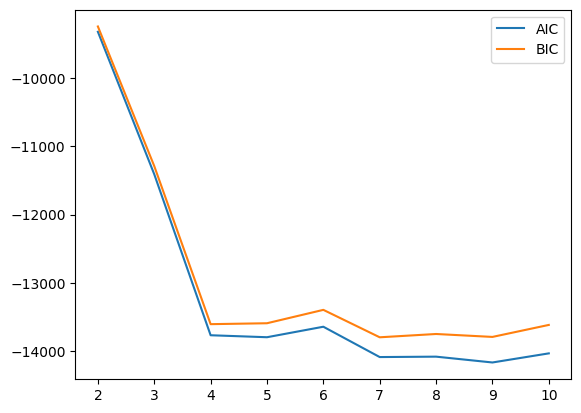

In [64]:
cols_LCA = ['TOPIC_3_lenguaje_matematica_historia_ciencias',
            'TOPIC_4_comprension_lectura_lectora_basico',
            'TOPIC_5_reciclaje_cuidado_ambiental_ambiente',
            'TOPIC_9_saludable_habitos_vida_alimentacion',
            'TOPIC_24_futbol_basquetbol_danza_tenis']

dict_df_models_agnos = {}
for a in range(2018,2023):
    
    print(a)
    # Establecimiento únicamente de enseñanza media 
    df_models_agno = df_models_total[(df_models_total.agno == a) & ((df_models_total.básica_niños_ind == 0)&(df_models_total.media_hc_jóvenes_ind == 1)& 
                                     (df_models_total.media_tp_y_artística_jóvenes_ind == 1))]
    
    aic_list = []
    bic_list = []
    
    for col in [cols_LCA]:
        df_models_agno.loc[:,col] = df_models_agno[col].rank(pct = True)

    for n_clust in [2,3,4,5,6,7,8,9,10]:
        # Create a continuous latent class model
        model = StepMix(n_components=n_clust, measurement="continuous", verbose=0, random_state=123)
        # Fit to data
        model.fit(df_models_agno[cols_LCA])
        # Save class membership predictions to df
        predictions = model.predict(df_models_agno[cols_LCA])
        df_models_agno.loc[:, 'LCA_clss_pred_'+str(n_clust)] = predictions

        print(df_models_agno['LCA_clss_pred_'+str(n_clust)].value_counts().sort_index()/len(df_models_agno))

        aic_list+=[model.aic(df_models_agno[cols_LCA])]
        bic_list+=[model.bic(df_models_agno[cols_LCA])]

        df = pd.DataFrame(model.predict_proba(df_models_agno[cols_LCA]))
        df['clase'] = model.predict(df_models_agno[cols_LCA])
        vals_list = []
        for c in range(n_clust):
            vals_list += [list(np.round(df[df.clase == c].mean(),3).values)]
        df_probs = pd.DataFrame(vals_list).T
        df_probs = df_probs.iloc[df_probs.index[:-1],:]
        print(df_probs)
        
    dict_df_models_agnos[a] = df_models_agno
    plt.plot([2,3,4,5,6,7,8,9,10], aic_list, label='AIC')
    plt.plot([2,3,4,5,6,7,8,9,10], bic_list, label = 'BIC')
    plt.legend()
    plt.show()

2018
0
[0.47203196 0.72945205 0.54497717 0.75022831 0.47945205]
1
[0.49584424 0.47945205 0.46803653 0.47488584 0.47945205]
2
[0.5856708  0.47945205 0.75190259 0.49836921 0.71754729]


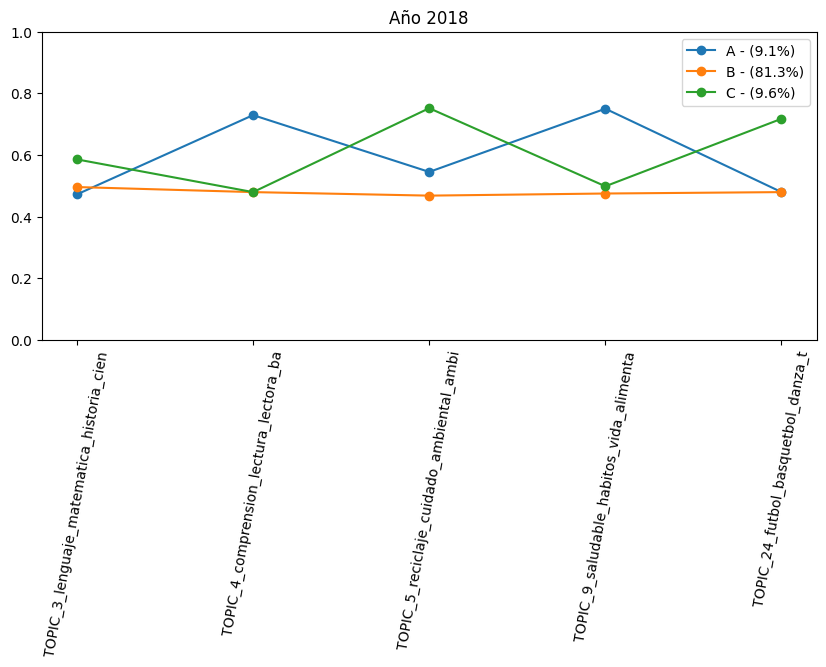

2019
0
[0.51677397 0.65333785 0.86326669 0.62876991 0.48678414]
1
[0.43832599 0.46255507 0.47797357 0.47356828 0.48678414]
2
[0.75928257 0.61778897 0.47797357 0.47356828 0.55842249]
3
[0.43832599 0.46255507 0.53255017 0.97161038 0.54136074]


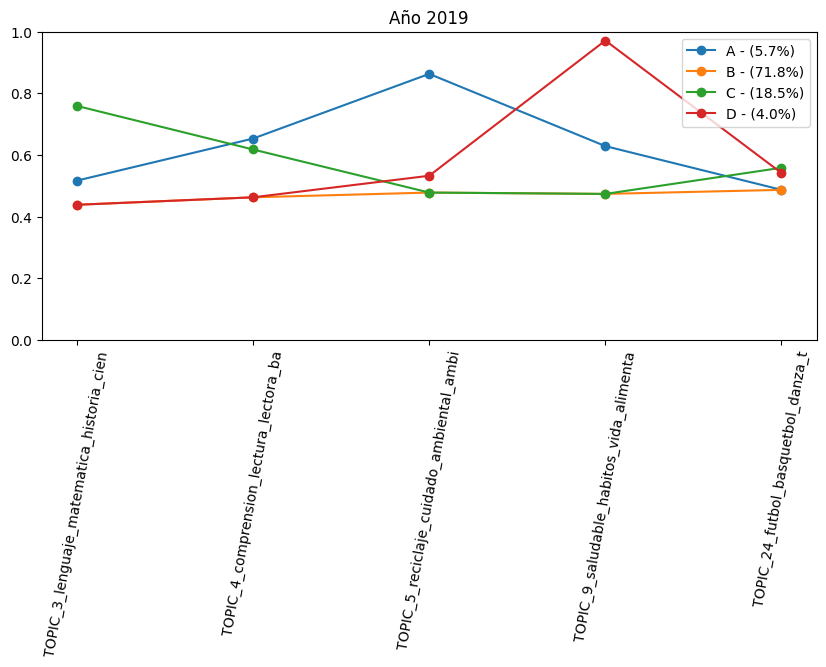

2020
0
[0.46666667 0.49791667 0.49791667 0.50429147 0.49791667]
1
[0.96666667 0.49791667 0.49791667 0.48125    0.49791667]
2
[0.46666667 0.66458333 0.66458333 0.48125    0.66458333]


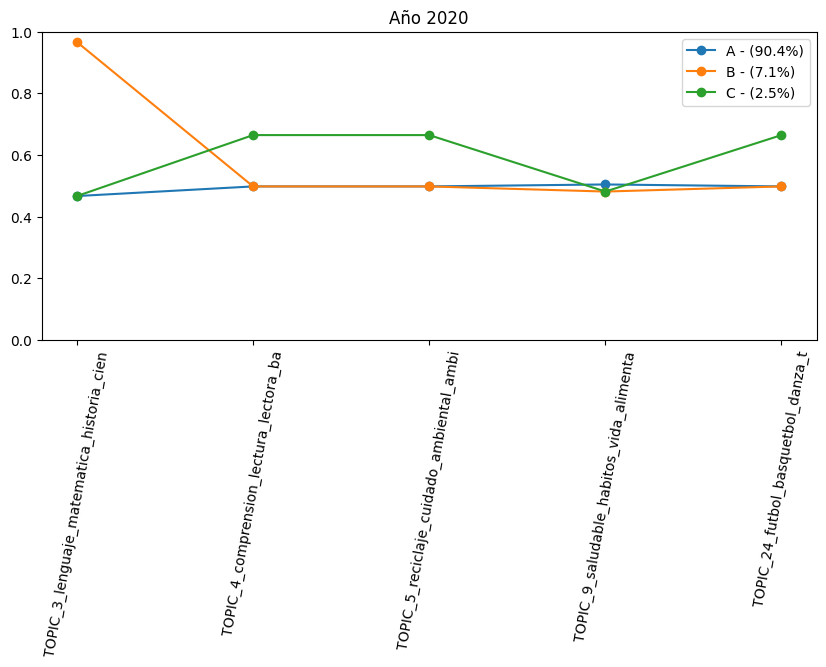

2021
0
[0.5024359 0.492     0.496     0.488     0.5      ]
1
[0.545      0.90866667 0.496      0.488      0.58333333]
2
[0.466 0.492 0.646 0.838 0.5  ]


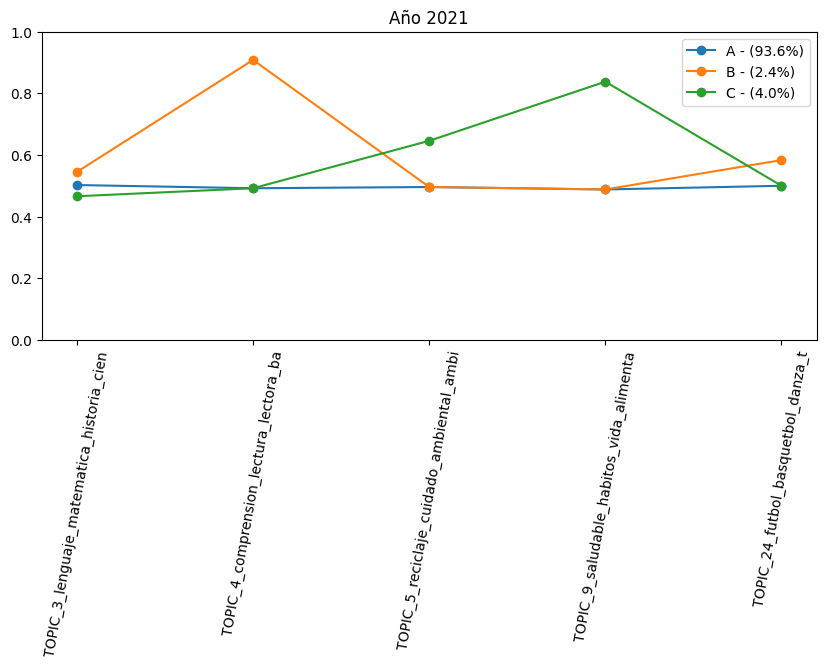

2022
0
[0.51213329 0.49203187 0.93661717 0.48406375 0.54545455]
1
[0.46812749 0.49203187 0.48207171 0.48406375 0.5       ]
2
[0.96998672 0.49203187 0.48207171 0.48406375 0.5       ]
3
[0.50879814 0.70036521 0.48207171 0.85906375 0.5       ]


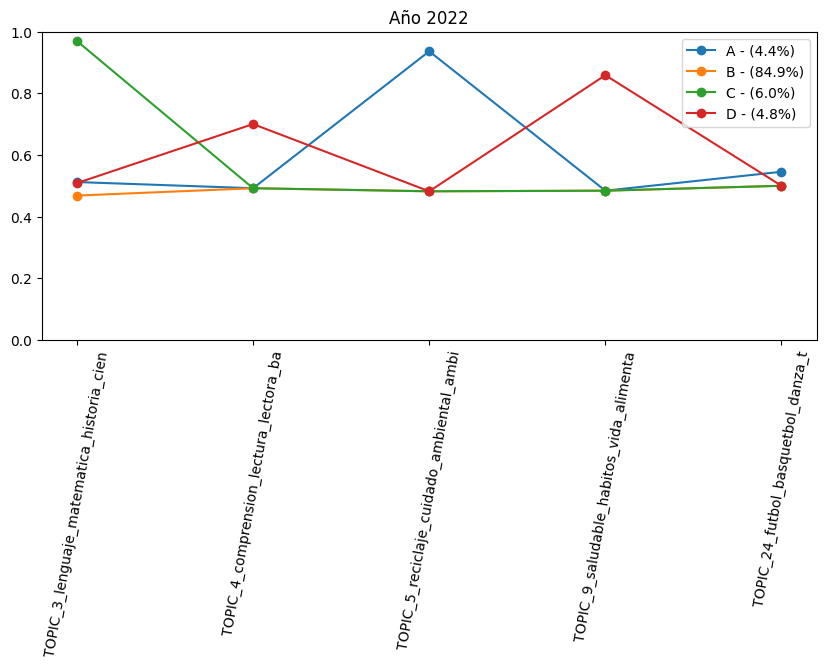

In [65]:
# los "-1" son por criterio de parsimonia
n_optimal_dict = {2018:3, 2019:4, 2020:4-1, 2021:4-1, 2022:4}
dict_class = {1:'A',2:'B', 3:'C', 4:'D'}

for a in range(2018,2023):
    print(a)
    n_optimal = n_optimal_dict[a]
    df_models_agno = dict_df_models_agnos[a]
    _,ax = plt.subplots(figsize=(10,4))
    j = 0
    for c in range(n_optimal):
        j+=1
        print(c)
        #if a != 2022:
        #    c+=1
        data_c = df_models_agno[df_models_agno['LCA_clss_pred_' + str(n_optimal)] == c]
        vals= data_c[cols_LCA].mean().values
        print(vals)
        ax.set_ylim([0,1])
        if a !=2022:
            ax.plot(range(len(cols_LCA)),vals,'-o', label = dict_class[j] +  ' - (' + str(np.round(100*len(data_c)/len(df_models_agno),1)) + '%)')
        else:
            
            ax.plot(range(len(cols_LCA)),vals,'-o', label = dict_class[j] + ' - (' + str(np.round(100*len(data_c)/len(df_models_agno),1)) + '%)')
            
        ax.set_xticks(range(len(cols_LCA)))
        ax.set_xticklabels([x[:-4] for x in cols_LCA], rotation=80)
        ax.set_title('Año ' + str(a))
    plt.legend(loc = 'upper right')
    plt.show()

#### Comparar respecto a variables fuera del PME

In [66]:
# Pasar dependencia a binario y otros cambias a columnas 
for a in range(2018,2023):
    df_models_agno = dict_df_models_agnos[a]    
    for val in df_models_agno.dependencia.unique():
        new_col = 'dependencia_' + val
        new_col = new_col.replace(' ','_')
        df_models_agno.loc[:,new_col] = (df_models_agno.dependencia == val).astype(int)
        
    for col in ['n_docentes','horas_contrato','horas_direct','horas_tec_ped','horas_aula']:
        df_models_agno.loc[:, col + '_por_estudiante'] = df_models_agno[col]/df_models_agno.total_matricula
        
    dict_df_models_agnos[a] = df_models_agno

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\565886530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:,new_col] = (df_models_agno.dependencia == val).astype(int)
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\565886530.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno.loc[:, col + '_por_estudiante'] = df_models_agno[col]/df_models_agno.total_matricula


In [67]:
dict_tablas = {}
# Crear resumen respecto a datos 
for a in range(2018,2023):
    df_models_agno = dict_df_models_agnos[a]    
    vals_list = []
    for c in range(n_optimal_dict[a]):

        data_c = df_models_agno[df_models_agno['LCA_clss_pred_' + str(n_optimal_dict[a])] == c]
        vals= data_c[sum_cols].mean().values
        vals_list += [vals]

    df = pd.DataFrame(vals_list).T
    df.index = sum_cols

    # Porcentajes
    for case in ['dependencia_Servicio_locales_de_Educacion',
            'dependencia_Particular_Subvencionado',
            'dependencia_Corporación_Municipal',
            'dependencia_Municipal_DAEM',
            'dependencia_Corporación_Privada_o_de_administración_delegada',
            'rural_rbd',
            'parvularia_ind',
            'básica_niños_ind',
            'media_hc_jóvenes_ind',
            'media_tp_y_artística_jóvenes_ind',
            'básica_adultos_ind',
            'media_hc_adultos_ind',
            'media_tp_y_artística_adultos_ind',
            'prioritario_alu']:
    
        df.loc[case,:] = 100*df.loc[case,:]
    
    df = np.round(df,2)
    df.index = [x.replace('_',' ') for x in df.index]
    
    dict_tablas[a] = df
    display(df)

,0,1,2
dependencia Servicio locales de Educacion,15.00,11.80,4.76
dependencia Particular Subvencionado,35.00,15.73,19.05
dependencia Corporación Municipal,0.00,11.80,23.81
dependencia Municipal DAEM,50.00,42.70,47.62
dependencia Corporación Privada o de administración delegada,0.00,17.98,4.76
rural rbd,0.00,3.93,4.76
parvularia ind,0.00,0.00,0.00
básica niños ind,0.00,0.00,0.00
media hc jóvenes ind,100.00,100.00,100.00
media tp y artística jóvenes ind,100.00,100.00,100.00


,0,1,2,3
dependencia Servicio locales de Educacion,7.69,14.11,2.38,0.00
dependencia Particular Subvencionado,23.08,17.18,26.19,22.22
dependencia Corporación Municipal,46.15,11.04,9.52,22.22
dependencia Municipal DAEM,23.08,44.17,42.86,55.56
dependencia Corporación Privada o de administración delegada,0.00,13.50,19.05,0.00
rural rbd,0.00,4.91,0.00,0.00
parvularia ind,0.00,0.00,0.00,0.00
básica niños ind,0.00,0.00,0.00,0.00
media hc jóvenes ind,100.00,100.00,100.00,100.00
media tp y artística jóvenes ind,100.00,100.00,100.00,100.00


,0,1,2
dependencia Servicio locales de Educacion,11.06,5.88,16.67
dependencia Particular Subvencionado,18.89,23.53,33.33
dependencia Corporación Municipal,14.29,5.88,16.67
dependencia Municipal DAEM,42.40,47.06,33.33
dependencia Corporación Privada o de administración delegada,13.36,17.65,0.00
rural rbd,3.69,0.00,0.00
parvularia ind,0.00,0.00,0.00
básica niños ind,0.00,0.00,0.00
media hc jóvenes ind,100.00,100.00,100.00
media tp y artística jóvenes ind,100.00,100.00,100.00


,0,1,2
dependencia Servicio locales de Educacion,9.40,33.33,30.00
dependencia Particular Subvencionado,22.22,0.00,30.00
dependencia Corporación Municipal,12.39,33.33,10.00
dependencia Municipal DAEM,41.88,33.33,30.00
dependencia Corporación Privada o de administración delegada,14.10,0.00,0.00
rural rbd,3.85,0.00,0.00
parvularia ind,0.00,0.00,0.00
básica niños ind,0.00,0.00,0.00
media hc jóvenes ind,100.00,100.00,100.00
media tp y artística jóvenes ind,100.00,100.00,100.00


,0,1,2,3
dependencia Servicio locales de Educacion,18.18,10.33,6.67,25.00
dependencia Particular Subvencionado,18.18,20.66,20.00,33.33
dependencia Corporación Municipal,18.18,14.08,6.67,25.00
dependencia Municipal DAEM,36.36,43.66,40.00,16.67
dependencia Corporación Privada o de administración delegada,9.09,11.27,26.67,0.00
rural rbd,0.00,4.23,0.00,0.00
parvularia ind,0.00,0.00,0.00,0.00
básica niños ind,0.00,0.00,0.00,0.00
media hc jóvenes ind,100.00,100.00,100.00,100.00
media tp y artística jóvenes ind,100.00,100.00,100.00,100.00


In [68]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(r'Tablas\tablas_latent_class_conceptos_topic_modeling.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet
for var in dict_tablas.keys():
    print(var)
    dict_tablas[var].to_excel(writer, sheet_name= str(var))
# Close the Pandas Excel writer and output the Excel file.
writer.close()

2018
2019
2020
2021
2022


### Consolidar bbdd

In [72]:
for a in range(2018,2023):
    df_models_agno = dict_df_models_agnos[a]    
    
    df_models_agno['LCA_TOPICS_' + str(a)] = df_models_agno['LCA_clss_pred_' + str(n_optimal_dict[a])] + 1

    df_models_agno = df_models_agno[[x for x in df_models_agno.columns if 'clss_pred_' not in x]]
       
    print(df_models_agno['LCA_TOPICS_' + str(a)].value_counts(dropna=False))
    
    if a == 2018:
        df_models_total_subcase = df_models_agno.copy()
    else:
        df_models_total_subcase = pd.concat([df_models_total_subcase,df_models_agno], axis=0)

2    178
3     21
1     20
Name: LCA_TOPICS_2018, dtype: int64
2    163
3     42
1     13
4      9
Name: LCA_TOPICS_2019, dtype: int64
1    217
2     17
3      6
Name: LCA_TOPICS_2020, dtype: int64
1    234
3     10
2      6
Name: LCA_TOPICS_2021, dtype: int64
2    213
3     15
4     12
1     11
Name: LCA_TOPICS_2022, dtype: int64


C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\4048955176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno['LCA_TOPICS_' + str(a)] = df_models_agno['LCA_clss_pred_' + str(n_optimal_dict[a])] + 1
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\4048955176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models_agno['LCA_TOPICS_' + str(a)] = df_models_agno['LCA_clss_pred_' + str(n_optimal_dict[a])] + 1
C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_17116\404895

In [9]:
for x in df_models_total_subcase.columns:
    print(x)

agno
rbd
region
deprov
comuna
dependencia
todo_texto_accion
total_acciones
rural_rbd
parvularia_ind
básica_niños_ind
media_hc_jóvenes_ind
media_tp_y_artística_jóvenes_ind
básica_adultos_ind
media_hc_adultos_ind
media_tp_y_artística_adultos_ind
básica_adultos
básica_niños
media_hc_adultos
media_hc_jóvenes
media_tp_y_artística_adultos
media_tp_y_artística_jóvenes
parvularia
n_docentes
horas_contrato
horas_direct
horas_tec_ped
horas_aula
ano_servicio_sistema
ano_servicio_ee
total_niveles
total_matricula
asistencia
prioritario_alu
idps_am
idps_cc
idps_hv
idps_pf
prom_idps
prom_lect
prom_mate
prom_mate_lect
fecha_duracion_meses
total_planes
plan_de_sexualidad_afectividad_y_género_ind
plan_de_desarollo_profesional_docente_ind
plan_de_gestión_de_la_convivencia_escolar_ind
plan_de_formación_ciudadana_ind
plan_integral_de_seguridad_escolar_ind
plan_de_apoyo_a_la_inclusión_ind
plan_ninguno_ind
n_frases_descripcion_plan
n_palabras_descripcion_plan
n_palabras_unicas_descripcion_plan
n_caracteres_d

# Análisis longitudinal descriptivo 

In [5]:
dict_label_old = {2018: {3: 'Completo', 1: 'Incipiente', 2: 'Intermedio'},
                  2019: {1: 'Intermedio', 2: 'Completo', 3: 'Incipiente'},
                  2020: {3: 'Intermedio', 1: 'Completo', 2: 'Incipiente'},
                  2021: {3: 'Incipiente', 2: 'Intermedio', 1: 'Completo'}}

dict_label_new = {1: 'Focalizado', 2: 'Incipiente', 3:'Completo' , 4:'Intermedio'}

In [11]:
df_models_total_subcase['final_mejor_que_inicio'] = np.nan 
df_models_total_subcase['final_peor_que_inicio'] = np.nan 
df_models_total_subcase['final_igual_que_inicio'] = np.nan 
df_models_total_subcase['mejora_continua'] = np.nan 
df_models_total_subcase['empeora_continua'] = np.nan 
df_models_total_subcase['constante_continua'] = np.nan 

In [15]:
df_models_tot = df_models_total_subcase.copy()

for ind, row in df_models_total_subcase.iterrows():
    rbd = row.rbd
    
    if len(df_models_tot[df_models_tot.rbd == rbd]) == 5:
        
        df_models_tot.loc[ind, 'final_mejor_que_inicio'] = (df_models_tot[(df_models_tot.agno == 2022) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2022.values[0]> 
                                                           df_models_tot[(df_models_tot.agno == 2018) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2018.values[0])

        df_models_tot.loc[ind, 'final_peor_que_inicio'] = (df_models_tot[(df_models_tot.agno == 2022) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2022.values[0]< 
                                                           df_models_tot[(df_models_tot.agno == 2018) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2018.values[0])
        df_models_tot.loc[ind, 'final_igual_que_inicio'] = (df_models_tot[(df_models_tot.agno == 2022) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2022.values[0]== 
                                                           df_models_tot[(df_models_tot.agno == 2018) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2018.values[0])

        df_models_tot.loc[ind, 'mejora_continua'] = (df_models_tot[(df_models_tot.agno == 2022) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2022.values[0]>= 
                                                           df_models_tot[(df_models_tot.agno == 2021) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2021.values[0]>= 
                                                           df_models_tot[(df_models_tot.agno == 2020) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2020.values[0]>= 
                                                           df_models_tot[(df_models_tot.agno == 2019) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2019.values[0]>=
                                                           df_models_tot[(df_models_tot.agno == 2018) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2018.values[0])

        df_models_tot.loc[ind, 'empeora_continua'] = (df_models_tot[(df_models_tot.agno == 2022) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2022.values[0]<= 
                                                           df_models_tot[(df_models_tot.agno == 2021) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2021.values[0]<= 
                                                           df_models_tot[(df_models_tot.agno == 2020) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2020.values[0]<=
                                                           df_models_tot[(df_models_tot.agno == 2019) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2019.values[0]<= 
                                                           df_models_tot[(df_models_tot.agno == 2018) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2018.values[0])

        df_models_tot.loc[ind, 'constante_continua'] = (df_models_tot[(df_models_tot.agno == 2022) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2022.values[0]== 
                                                           df_models_tot[(df_models_tot.agno == 2021) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2021.values[0]== 
                                                           df_models_tot[(df_models_tot.agno == 2020) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2020.values[0]==
                                                           df_models_tot[(df_models_tot.agno == 2019) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2019.values[0]== 
                                                           df_models_tot[(df_models_tot.agno == 2018) & 
                                                                          (df_models_tot.rbd == rbd)].LCA_PLANES_2018.values[0])
       

In [ ]:
list_vals = []
j = 0
for case in ['final_mejor_que_inicio','final_peor_que_inicio', 'final_igual_que_inicio','mejora_continua',
             'empeora_continua','constante_continua']:
    print(case)
    df_cross = np.round(100*pd.crosstab(df_models_tot.region,df_models_tot[case], normalize='index'),2)
    
    if j == 0:
        df_cross_tot = df_cross[1]
    else:
        df_cross_tot = pd.concat([df_cross_tot, df_cross[1]], axis=1)
    j+=1

In [ ]:
df_cross_tot.columns = ['final_mejor_que_inicio','final_peor_que_inicio', 'final_igual_que_inicio','mejora_continua',
             'empeora_continua','constante_continua']
df_cross_tot.to_excel(r'Tablas\tablas_modelo_longitudinal.xlsx')
df_cross_tot

# Ordenar y guardar

In [34]:
for col in df_models_tot.columns:
    
    perc = df_models_tot[col].isna().sum()/len(df_models_tot)
    
    if '.' in col:
        print(col)
        df_models_tot = df_models_tot.rename(columns = {col:col.replace('.','')})
        
    if ':' in col:
        print(col)
        df_models_tot = df_models_tot.rename(columns = {col:col.replace(':','')})

    

Subtema_Foco_en_asignaturas.Lectura
Subtema_Foco_en_asignaturas._Ingles
Subtema_Foco_en_asignaturas._Matematica
Subtema_Foco_en_asignaturas._Ciencias_Naturales
Subtema_Foco_en_asignaturas._Ciencias_Sociales
Subtema_Foco_en_asignaturas._Artes
Subtema_Foco_en_asignaturas.Orientacion
Subtema_Foco_en_asignaturas.Tecnologia
Subtema_Foco_en_asignaturas._Lengua_y_Cultura_de_los_Pueblos_Originarios_Ancestrales:_
Subtema_Foco_en_asignaturas._Lengua_y_Cultura_de_los_Pueblos_Originarios_Ancestrales:_
Subtema_Foco_en_asignaturas._Programas_propios


In [35]:
df_models_tot = df_models_tot.rename(columns = {'Tema_Asistencia_Tecnica_Educativa_(ATE)\n':'Tema_Asistencia_Tecnica_Educativa'})
df_models_tot =  df_models_tot.drop(columns = ['todo_texto_accion'])

In [39]:
df_models_tot.to_csv(r'Datos\Finales\Nivel_PME\df_planificacion_implementacion_total_2018_2022_PME_FINAL_CLASES.csv', index = False)

In [37]:
for col in df_models_tot.columns:
    print(df_models_tot[col].describe())

count    43311.000000
mean      2020.003625
std          1.410031
min       2018.000000
25%       2019.000000
50%       2020.000000
75%       2021.000000
max       2022.000000
Name: agno, dtype: float64
count    43311.000000
mean     10172.816883
std       8671.017334
min          1.000000
25%       3614.000000
50%       7740.000000
75%      14568.000000
max      42041.000000
Name: rbd, dtype: float64
count                                   43311
unique                                     16
top       METROPOLITANA DE SANTIAGO          
freq                                     9348
Name: region, dtype: object
count                                                 43311
unique                                                   44
top       Cautin Norte                                  ...
freq                                                   2285
Name: deprov, dtype: object
count                                                 43311
unique                                                 

C:\Users\JoaquinFarina\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\JoaquinFarina\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\JoaquinFarina\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\JoaquinFarina\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\JoaquinFarina\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\JoaquinFarina\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\U

count    43311.000000
mean         0.000210
std          0.005633
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.375000
Name: programa_asociado_integrando_la_ruralidad, dtype: float64
count    43311.000000
mean         0.000601
std          0.010468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: programa_asociado_mi_taller_digital, dtype: float64
count    43311.000000
mean         0.001119
std          0.021986
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: programa_asociado_enlaces, dtype: float64
count    43311.000000
mean         0.000111
std          0.002883
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.167000
Name: programa_asociado_inglés_abre_puertas, dtype: float64
count    43311.000000
mean         0.005262
std          0.054232


count    43311.000000
mean         0.668352
std          1.029088
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         12.000000
Name: Uxxi_Tinno_Smat_matematica, dtype: float64
count    43311.000000
mean         0.068297
std          0.298692
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Uxxi_Tinno_Snat_ciencias_naturales, dtype: float64
count    43311.000000
mean         0.006373
std          0.085989
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: Uxxi_Tinno_Snat_quimica, dtype: float64
count    43311.000000
mean         0.366858
std          0.687622
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         11.000000
Name: Uxxi_Tinno_Snat_fisica, dtype: float64
count    43311.000000
mean         0.008150
std          0.096357
min          0.000000
25%        

count    43311.000000
mean         1.321350
std          1.676514
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         31.000000
Name: Uconv_Tgen_Sgen_diversidad, dtype: float64
count    43311.000000
mean         0.004295
std          0.068159
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: Uconv_Tgen_Sgen_diversidad_sexual, dtype: float64
count    43311.000000
mean         0.175036
std          0.460192
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Uconv_Tgen_Sedse_sexualidad, dtype: float64
count    43311.000000
mean         0.002863
std          0.053431
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Uconv_Tgen_Sedse_salud_sexual, dtype: float64
count    43311.000000
mean         0.348780
std          0.662401
min          0.000000
2

count    43311.000000
mean         0.030906
std          0.057563
min          0.000000
25%          0.000000
50%          0.000000
75%          0.050000
max          0.786000
Name: Ulid_Tlid_Slim2_plan_de_accion, dtype: float64
count    43311.000000
mean         0.004202
std          0.066101
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: Ulid_Tlid_Slim2_bien_comun, dtype: float64
count    43311.000000
mean         0.001685
std          0.042131
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: Ulid_Tlid_Slim2_incertidumbre, dtype: float64
count    43311.000000
mean         0.004872
std          0.086755
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: Ulid_Tlid_Slim2_replantear, dtype: float64
count    43311.000000
mean         0.002217
std          0.047028
min          0.000000
25%  

count    43311.000000
mean         0.637686
std          0.187823
min          0.000000
25%          0.500000
50%          0.649000
75%          0.769000
max          1.000000
Name: Tema_Liderazgo, dtype: float64
count    43311.000000
mean         0.386093
std          0.160832
min          0.000000
25%          0.273000
50%          0.378000
75%          0.500000
max          1.000000
Name: ema_Asistencia_Tecnica_Educativa, dtype: float64
count    43311.000000
mean         0.154584
std          0.118261
min          0.000000
25%          0.071000
50%          0.130000
75%          0.222000
max          0.875000
Name: Tema_Gabinete_DEG, dtype: float64
count    43311.000000
mean         0.001649
std          0.013846
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.583000
Name: Tema_Trayectoria_Educativas_y_aprendizajes_a_lo_largo_de_la_vida, dtype: float64
count    43311.000000
mean         0.032468
std          0.053582
min        

count           8727
unique             3
top       Intermedio
freq            3930
Name: LCA_PLANES_2020, dtype: object
count           8788
unique             3
top       Intermedio
freq            4195
Name: LCA_PLANES_2021, dtype: object
count           8585
unique             4
top       Incipiente
freq            2819
Name: LCA_PLANES_2022, dtype: object
count     39380
unique        2
top       False
freq      29245
Name: final_mejor_que_inicio, dtype: object
count     39380
unique        2
top       False
freq      20530
Name: final_peor_que_inicio, dtype: object
count     39380
unique        2
top       False
freq      28985
Name: final_igual_que_inicio, dtype: object
count     39380
unique        2
top       False
freq      31345
Name: mejora_continua, dtype: object
count     39380
unique        2
top       False
freq      23490
Name: empeora_continua, dtype: object
count     39380
unique        2
top       False
freq      35905
Name: constante_continua, dtype: object


In [15]:
X = "[2:09 AM, 6/30/2023] +56 9 5607 3520: Hola! Creo que me perdi de la encuesta. La tienen por ahi. Aprovecho de felicitarles por la iniciativa y a Macarena por sus preguntas de reflexion que de seguro seran parte de las discusiones futuras[2:10 AM, 6/30/2023] Leonel Huerta: hola! estamos afinando algunos detalles respecto de la encuesta, creo que la enviamos mañana[2:10 AM, 6/30/2023] Leonel Huerta: gracias a todos por participar[2:10 AM, 6/30/2023] Leonel Huerta: descansen![2:11 AM, 6/30/2023] +56 9 7136 5833: Hola a todos!![2:39 AM, 6/30/2023] Macarena Santana: Un gusto formar parte y gracias por escuchar activamente. Un abrazo a todos[6:33 PM, 6/30/2023] +56 9 5607 3520: Hola! Hay algún reglamento de este chat?[6:34 PM, 6/30/2023] +56 9 5607 3520: Me gustaría compartirles una invitación a un evento a que les puede interesar ;)[6:42 PM, 6/30/2023] Leonel Huerta: hola! me parece que no tenemos reglamento todavía, jaja, pero si la invitación tiene que ver con analítica educativa, me parece que cae dentro de los objetivos, así que dale nomás Felipe![7:39 PM, 6/30/2023] +56 9 5607 3520: Yapo, la enviaré. Después dime si está dentro del scope[7:40 PM, 6/30/2023] +56 9 5607 3520: Les comparto esta invitación por si están interesados 🤗. Link de inscripción: https://forms.gle/tA6PYMhz9Q4T6hpXA[10:33 PM, 7/1/2023] Macarena Santana: Yo les comparto un artículo de visualizacion de datos bien entretenido. Muestra algunas visualizaciones menos típicas. Un abrazohttps://queue.acm.org/detail.cfm?id=1805128[9:46 PM, 7/4/2023] Leonel Huerta: la vamos a mandar en breve @~Erick , jaja[3:15 PM, 7/5/2023] Leonel Huerta: buenos días a todos! bienvenidos los nuevos! consulta, alguien acá que haya participado del zoom de la semana pasada y no le haya llegado la encuesta? que tengan un excelente día!Buenos días Equipo! Les cuento que vengo cerrando unos días muy enriquecedores (e intensos) de un programa de política educativa, en que el presenté una propuesta para potenciar el desarrollo y atracción de competencias analítica en instituciones educativas. ¡Mucho puede ocurrir si nos unimos y empujamos! 💪🏻💪🏻Aprovecho de compartir esta interesante guía resumen de IA para líderes escolares[4:27 PM, 7/5/2023] +56 9 5607 3520: Bacan![5:21 PM, 7/5/2023] Macarena Santana: Me llegó![9:02 PM, 7/5/2023] +56 9 6834 8484: A mi no!![9:02 PM, 7/5/2023] +56 9 6834 8484: 🙌🙌¡!RECURSO! By studying this book, you will:• Know where to locate useful educational data in different data sources and understand their limitations• Know the basics for managing educational data to make them useful, understand relevant methods and be able to use relevant tools• Know the basics for organising, analysing, interpreting and presenting learner-generated data within their learning context, understand relevant learning analytics methods, and be able to use relevant learning analytics tools[4:22 PM, 7/6/2023] Macarena Santana: Wena! Gracias!!![5:35 PM, 7/6/2023] Macarena Santana: Cómo puedo invitar a alguien a este grupo?[5:37 PM, 7/6/2023] Leonel Huerta: https://chat.whatsapp.com/DW1wWkkqKv5GgiXae9WPod[5:37 PM, 7/6/2023] Leonel Huerta: con ese link![5:41 PM, 7/6/2023] Joaquin Farina: y que se inscriban!! https://tccolumbia.qualtrics.com/jfe/form/SV_50gjN6xcfdPf8lU[5:41 PM, 7/6/2023] +56 9 6183 0057: yo tampoco[5:41 PM, 7/6/2023] Joaquin Farina: y en spam??[5:46 PM, 7/6/2023] +56 9 5687 2880: Hola! quizás los recursos los podríamos tener ordenados en una carpeta compartida, más que enviar solo por acá que se pierde.[5:47 PM, 7/6/2023] +56 9 7136 5833: Buena idea![5:58 PM, 7/6/2023] Joaquin Farina: Absolutamente Roberto! estamos armando la sección de recursos en la página y también abriremos un drive[3:27 PM, 7/10/2023] Joaquin Farina: Querida Comunidad! espero estén empezando una gran semana 💪🏻💪🏻 somos bastante las nuevas adicione a este gran grupo, así que invito a cada uno/a a presentarse brevemente 🧐 Les propongo (1) nombre (2) campo /dominio primario (3) ocupación y lo más importante (4) sticker o emoji favorito! 🙌🏻[3:28 PM, 7/10/2023] Joaquin Farina: Joaquín Fariña, Ingeniero Matemático, métodos cuantitativos en educación, investigador/consultor y estudiante[3:39 PM, 7/10/2023] +56 9 5607 3520: Felipe Urrutia, estudiante de doble titulación Ingeniería Matemática y Magister en Ciencias de la Computacion, investigador asistente en minería de datos educacionales[4:16 PM, 7/10/2023] José Gorrini CIM: José Gorrini, Ingeniero Informático apasionado por la educación escolar, coordinador de innovacion tecnologica de enlaces - ministerio de educacion de chile[4:21 PM, 7/10/2023] +56 9 7136 5833: Buenos días!![4:21 PM, 7/10/2023] +56 9 7136 5833: Cristian González, Licenciado en Física/ Profesor de Física/ Ingeniero Civil Informático, Magíster en Ciencias de la Computación(c). Analista de datos en Medioambiente.[5:25 PM, 7/10/2023] +507 6997-6025: Buen día a todos 🙋🏻‍♀️.Yessenia Guadalupe / Lic. en Biología / Asistente de laboratorio de ciencias de secundaria. No tengo experiencia con la investigación dentro del sistema educativo así que estoy muy feliz de haber coincidido con este grupo para aprender de todos ustedes.[5:28 PM, 7/10/2023] +56 9 4106 5510: Buen día! Sandra González, Ingeniera Civil y estudiante de ped. matemática. He trabajado en análisis de datos en educación en fundaciones y ONGs. Lamentablemente las reuniones de los jueves coinciden con mi horario de clases así que no me puedo conectar en vivo, pero estoy feliz de poder ver las sesiones después y tener acceso al material que se comparte ![9:20 PM, 7/10/2023] Leonel Huerta: Hola a todos! Por acá Leo Huerta, Ingeniero Civil Matemático, trabajo como analista de datos en DEMRE y apoyo en algunos proyectos de investigación en la U de Chile.[9:20 PM, 7/10/2023] Leonel Huerta: este es un gif que me gusta[9:21 PM, 7/10/2023] Leonel Huerta: jajaja[9:23 PM, 7/10/2023] +56 9 5687 2880: Hola! Roberto Muñoz, Dr. en Ing. Informática y director de la Escuela de Ing. Informática de la Universidad de Valparaíso. Principalmente trabajo en un área que se denomina analítica multimodal del aprendizaje.[9:26 PM, 7/10/2023] +56 9 6183 0057: Hola, Soy Erick Merino y soy informático, me gusta el ML y trabajo en el mineduc también, José Gorrini es mi jefe xdxd y fui tesista de Roberto Muñoz xdxd[9:26 PM, 7/10/2023] +56 9 6183 0057: Mi emoticón favorito es 😱[9:26 PM, 7/10/2023] +56 9 6183 0057: Y 😨 también pero principalmente 😱[9:27 PM, 7/10/2023] +56 9 6183 0057: 😱[11:59 PM, 7/10/2023] Joaquin Farina: Muchas gracias a los que han compartido 🤩 les cuento que con Leo estamos armando la pagina de recursos y organizando nuestro segundo encuentro, asi que atent@s![12:04 AM, 7/11/2023] +56 9 6834 8484: Hola a todos! Soy MLuisa Parot, ingeniera comercial y profesora de media de matemáticas. Estoy a cargo del dpto de matemáticas de un colegio en Lampa y haciendo clases en III medio actualmente 😃 tengo poca experiencia en datos, pero muchas ganas de aprender y conocer!!! Gracias por la iniciativa 🙌[12:40 AM, 7/11/2023] Macarena Santana: Hola a todos!!!! Soy Maca Santana, postdoc e ingeniera. Hice clases 2 años de mate por Enseña Chile.  Me entretuve mucho leyendo las presentaciones. Mis sticker favoritos varían con el tiempo pero ando obsesionada con este:[12:48 AM, 7/11/2023] +502 5515 0100: Hola a todos mi nombre María Fernanda Najera Por culminar una Msc en Estadística Aplicada trabajo en el depto. De Estadística del Seguro Social de Guatemala👍👍👍👍👍a la orden y contenta de adquirir más conocimientos 😬[12:55 AM, 7/11/2023] +56 9 8705 6279: Hola!! Alejandro Garrido por aquí, ingeniero civil químico y profesor de matemáticas. Me apasiona la educación por lo que actualmente me dedico 100% a realizar clases de matemáticas en un colegio de Puente alto.[3:11 PM, 7/11/2023] Joaquin Farina: Que maravilloso leerles!! 🤩 mucha diversidad de funciones y profesiones, y muy especialmente con presencia de profes!! 💪🏻🙌🏻Aludiendo a lo que varios hacen, les comparto este nuevo paper que propone principios para una gobernanza de datos en educación con foco en la equidad 🧐[11:45 PM, 7/11/2023] Joaquin Farina: Interesantísimo evento! https://meetoecd1.zoom.us/meeting/register/tJwkdemopj0pHNEksLPioTqAj_qyuIz3VMkH[2:58 PM, 7/12/2023] Francisca Ricaurte ECH: Gracias por compartir![3:07 PM, 7/12/2023] José Gorrini CIM: Buenisimo, de ahi somos[2:38 PM, 7/13/2023] Joaquin Farina: ¡Buenos días Comunidad! A veces cambios simples pueden hacer grandes diferencias en lo efectivos que somos al comunicar información. Así que hoy les comparto este sitio con paletas de colores! todo software estadístico acepta esos códigos. Buena fuente de inspiración! https://coolors.co/palettes/popular[11:12 PM, 7/13/2023] José Gorrini CIM: Elimine el documento, porque lo terminé de leer y lo encontré malo 😂[11:25 PM, 7/13/2023] Joaquin Farina: La intención vale mucho José! Yo no lo alcancé a leer bien pero parecía interesante! Más que bienvenido todo aporte 🙌🏻[11:29 PM, 7/13/2023] José Gorrini CIM: A mi tb me pareció interesante, pero al final el resultado era muy específico a la realidad del país no generalizable.[11:35 PM, 7/13/2023] Joaquin Farina: Pasa mucho! Es pega importante bajar la evidencia a nuestro contexto, pero se puede 💪🏻[12:13 AM, 7/14/2023] Joaquin Farina: Bienvenida Camila que se nos une desde España! Con una interesantisima trayectoria![12:14 AM, 7/14/2023] Joaquin Farina: Bienvenida a presentarte![12:37 AM, 7/14/2023] Camila Maldavsky Boben.: Gracias Joaquín! Gracias por integrarme al grupo. Soy Camila Maldavsky, titulada de ing industrial y ahora egresada del máster de formación del profesorado en Madrid (que dura un año y habilita para ser profe de secundaria). Convencida que quiero trabajar por la justicia social a través de la educación y del deporte, he colaborado con comunidades, clubes deportivos y también he entrado a colaborar en la cárcel. Ahora vivo en Madrid y colaboro como profe de mates en un club deportivo en un barrio migrante. Tengo muchas ganas de aprender sobre analítica educativa y profundizar mi carrera en ese camino. Si alguien quiere contactarme por lo que sea o por la experiencia en el extranjero, no lo dude (: un saludo a todos y todas![12:42 AM, 7/14/2023] Leonel Huerta: bienvenida Camila! que gusto leer sobre tus convicciones. Saludos desde la distancia![4:34 PM, 7/14/2023] Joaquin Farina: Viernes de meme! Importante tener siempre presente que todo modelo de IA se contruye a partir de datos![12:00 AM, 7/16/2023] Joaquin Farina: ¡entrevsita! Si me permiten pedirles una cosa en la vida, sería que vean esta reciente entrevista a Alex Bowers, uno de mis grandes mentores. Mucho de lo que plantea lo hemos discutido de perspectivas super técnica/cuantitativa. De mucho valor para mi ver cómo comunica a una audiencia amplia ideas técnicamente complejas. https://www.youtube.com/watch?v=7bTnyxnHvTY&t=139s[12:43 AM, 7/18/2023] Joaquin Farina: ¡Salió nuestro primer newsletter! 🤩 con mucho cariño y partiendo sencillo, de a poco iremos formando espacios de mucho valor! y para rematar va la invitación al evento de este mes ¡invitado de lujo nuevamente![12:47 AM, 7/18/2023] Leonel Huerta: (avisen si a alguien no le llega el correo y cae a spam pls!)[10:15 AM, 7/18/2023] Camila Maldavsky Boben.: Muchas gracias a ambos![3:48 PM, 7/19/2023] José Gorrini CIM: https://www.deakin.edu.au/research/research-news-and-publications/articles/deakin-pro-vice-chancellor-matthew-clarke-says-universities-need-to-provide-more-guidance-for-the-use-of-ai-in-research Interesante articulo sobre guias para el uso de IA Generativa en estudios[4:44 PM, 7/19/2023] Joaquin Farina: Todavía me da la sensación de ser muy temeroso. Yo soy más de la idea de fusionarse con los LLMs a riesgo y responsabilidad de cada uno[4:45 PM, 7/19/2023] Leonel Huerta: se ve interesante! lo voy a mirar! gracias José![4:48 PM, 7/19/2023] José Gorrini CIM: Si, de acuerdo como tdo lo que se esta mostrando recientemente genera muchos temores, es un proceso[5:10 PM, 7/19/2023] Joaquin Farina: De acuerdo[5:41 PM, 7/19/2023] Macarena Santana: Holholi aquí cachando poco. Que es IA generativa? Y a qué se refieren con mezclar con LLMs. Asumo que te refieres a mezclar con Grandes Modelos de Lenguage . Pero IA ya es eso o no? Ahí me perdí[6:04 PM, 7/19/2023] +56 9 7136 5833: Según ChatGPT uno es un subconjunto del otro[6:05 PM, 7/19/2023] Macarena Santana: Claro eso entiendo yo, por eso no entendí lo de fusionarse si ya son subconjunto. O quizás LLM se refería a otra cosa, igual no he leído el artículo  jajaja[6:27 PM, 7/19/2023] +56 9 6183 0057: En la jerarquía de conocimiento desde lo más amplio está:MatemáticasProbabilidades: Un subconjunto de matemáticasInteligencia artificial: Cómo hacer que un computador tenga comportamientos humanosMachine learning: Un subconjunto de inteligencia artificial, se trata de modelos matemáticos con parámetros (espacios en una fórmula o ecuación), los cuales se llenan con un método probabilístico de optimizaciónDeep Learning: Un tipo de machine learning que consta de modelos matemáticos (fórmulas) que consisten en nodos interconectados, cada nodo ejecuta una o varias operaciones matemáticas, y entrega su salida a los siguientes nodosIA generativa: Subconjunto de IA y Machine learning, técnicas para construir modelos que sean capaces de generar datos que se …[6:33 PM, 7/19/2023] +56 9 6183 0057: En resumen (como diría chatgpt)Los LLM son un tipo de modelo matemático de machine learning, que pertenecen al subconjunto Deep learning (Redes neuronales, es lo mismo), y más específicamente redes neuronales de tipo Transformers, son modelos de mínimo varios Gigabytes de peso, con millones o miles de millones de parámetros, optimizados en supercomputadores por semanasEjemplos de LLM usados para generar contenido son chatgpt, bard, llama, GPT-J, entre otros[6:39 PM, 7/19/2023] Macarena Santana: Gracias🎈[6:42 PM, 7/19/2023] José Gorrini CIM: Osea ni lo uno ni lo otro sino que todo lo contrario 😂[6:52 PM, 7/19/2023] +56 9 6183 0057: No es viernes de memes pero cae como anillo al dedo[11:15 PM, 7/19/2023] +56 9 5607 3520: son tipos de Language Model (LM); comunmente son Transformers pero no es necesario[11:16 PM, 7/19/2023] +56 9 5607 3520: chuta, recien lei esto[1:02 AM, 7/21/2023] Joaquin Farina: Nuevo centro Works Hub for Global Education en Oxford! The Hub brings together academics, NGOs and government partners to enable learning for three million children directly in low- and middle-income countries,Works Hub for Global Education and influence outcomes for up to 17 million more. A particular focus will be on improving learning outcomes for girls.  muy posiblemente prontos líderes en enlazar evidencia y práctica, muchos datos y analítica educativa! https://www.bsg.ox.ac.uk/news/new-what-works-hub-global-education-will-turn-evidence-learning-reality-millions-childrenñ[1:06 AM, 7/21/2023] +56 9 5607 3520: El enlace está malo[1:20 AM, 7/21/2023] +56 9 9276 0055: El enlace no, es la página q no la encuentra[1:20 AM, 7/21/2023] Macarena Santana: Ahh parece que se le pasó una ñ al final[1:21 AM, 7/21/2023] Macarena Santana: https://www.bsg.ox.ac.uk/news/new-what-works-hub-global-education-will-turn-evidence-learning-reality-millions-children[4:30 PM, 7/21/2023] Joaquin Farina: Diagrama no exhaustivo pero muy estimulante respecto a lo que define el contexto en ambientes de aprendizajes. Creado por Anne-Raphaëlle Centonze (artista visual) resumiendo la última conferencia de la fundación Jacobs. ¿Cuánto somos capaces de medir e incorporar en nuestros modelos? ¿tiene sentido buscar cuantificar todo?[5:53 PM, 7/21/2023] Joaquin Farina: Viernes de memes![2:35 PM, 7/24/2023] Joaquin Farina: ¡No olvidar invitación al encuentro mensual de la Comunidad 🥳!  datoseducacion.org/eventos¡gran semana para tod@s![3:48 PM, 7/24/2023] José Gorrini CIM: Mañana 😲[4:24 PM, 7/24/2023] Leonel Huerta: 💪[5:27 PM, 7/25/2023] Leonel Huerta: hola! cómo están todos!? up a este mensaje! para que se sumen todos los que puedan hoy en la tarde! estaría bueno verlos.  que tengan una excelente tarde!"

In [17]:
len([x for x in X if '[' == x])

93